## **Welcome to My Data Science Project**


**Feel free to connect with me on LinkedIn for more professional updates and networking**

<a href="https://eg.linkedin.com/in/mahmoud-abdelmoaty-0b73a8249" target="_blank">LinkedIn</a>

**Here,in this ribo you can find more about my ML projects**

<a href="https://github.com/Mahmoud1052000/ML-projects-" target="_blank">github</a>

*   Mahmoud Ebrahim
*   Junior Data Scientist

## **Problem**

Sports Wear Group is one of the leading retailers industry in the region, with more than 50 branches
across the region. It runs multiple lines of business applications, mainly in the sport goods industry.
They are in the middle of their digital transformation journey and they want to keep leading the
market by satisfying their customers and meeting their expectation and they want to know whether data analysis will be useful for them or not.








### **About DataSet**

The provided data represents information from a marketing campaign. We provided information about
the product in the campaign/offer that was send to a specific customer and the convergence result of
this campaign (label attribute). We provided every attribute we have about the product, use what ever
you see make sense to solve the defined project.

Here is a list of the attributes:
• country: Country name
• article: 6 digit article number, as unique identifier of an article
• sales: total number of units sold in respective retail week
• regular_price: recommended retail price of the article
• current_price: current selling price (weighted average over the week)
• ratio: price ratio as current_price/regular_price, such that price discount is 1-ratio
• retailweek: start date of the retailweek
• promo1: indicator for media advertisement, taking 1 in weeks of activation and 0 otherwise
• promo2: indicator for store events, taking 1 in weeks with events and 0 otherwise
• customer_id: customer unique identifier, one id per customer
• article: 6 digit article number, as unique identifier of an article
• productgroup: product group the article belongs to
• category: product category the article belongs to
• cost: total costs of the article (assumed to be fixed over time)
• style: description of article design
• sizes: size range in which article is available
• gender: gender of target consumer of the article
• rgb_*_main_color: intensity of the red (r), green (g), and blue (b) primaries of the article‘s main
color, taking values [0,250]
• rgb_*_sec_color: intensity of the red (r), green (g), and blue (b) primaries of the article‘s secondary
color, taking values [0,250]
• label: advertisement result after offering/sending/presenting the offer to the customer. 0
means the customer did not buy and 1 means the costomer did buy.
Time Frame
You will be given maximum 3 days to complete this work.
Submission Files


# All the Lifecycle In A Data Science Projects

**1.Data Analysis**

**2.Feature Engineering**

**3.Feature Selection**

**4.Model Building**

**5.Model Deployment**
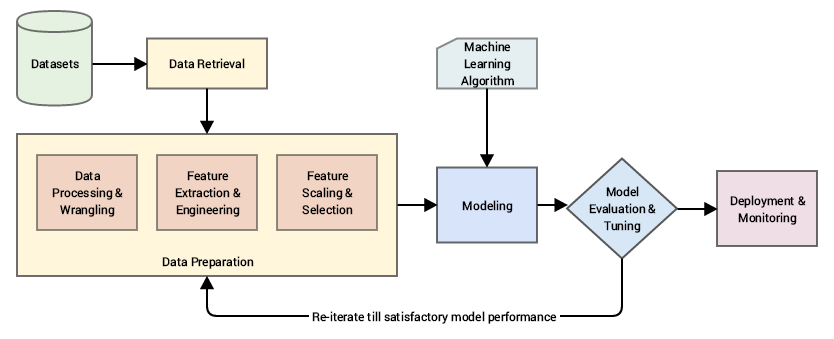

### Import Necssaries Libraries

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from scipy.stats import skew, kurtosis
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
import joblib #for saving models
%matplotlib inline

## Exploring and Preprocessing Data


In [3]:
df = pd.read_csv('full_gen_data.csv')
df.head()

,country,article,sales,regular_price,current_price,ratio,retailweek,promo1,promo2,customer_id,...,style,sizes,gender,rgb_r_main_col,rgb_g_main_col,rgb_b_main_col,rgb_r_sec_col,rgb_g_sec_col,rgb_b_sec_col,label
0,Germany,YN8639,28,5.95,3.95,0.663866,2016-03-27,0,0,1003.0,...,slim,"xxs,xs,s,m,l,xl,xxl",women,205,104,57,255,187,255,0
1,Germany,YN8639,28,5.95,3.95,0.663866,2016-03-27,0,0,1003.0,...,regular,"xxs,xs,s,m,l,xl,xxl",women,188,238,104,255,187,255,0
2,Germany,YN8639,28,5.95,3.95,0.663866,2016-03-27,0,0,1003.0,...,regular,"xxs,xs,s,m,l,xl,xxl",women,205,173,0,255,187,255,0
3,Germany,YN8639,28,5.95,3.95,0.663866,2016-03-27,0,0,1003.0,...,regular,"xxs,xs,s,m,l,xl,xxl",kids,205,140,149,164,211,238,0
4,Germany,YN8639,28,5.95,3.95,0.663866,2016-03-27,0,0,1003.0,...,regular,"xxs,xs,s,m,l,xl,xxl",women,138,43,226,164,211,238,0


In [4]:
df['sizes'].replace('xxs,xs,s,m,l,xl,xxl', 'Size1' ,inplace=True)
df['sizes'].replace('xs,s,m,l,xl', 'Size2' ,inplace=True)
df.sizes.value_counts()

sizes
Size1    90000
Size2    10000
Name: count, dtype: int64

##### *We notic that we have 10000 row and 24 column in our dataset* , now lets lern more about our dataset usind info() function

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 24 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   country         100000 non-null  object 
 1   article         100000 non-null  object 
 2   sales           100000 non-null  int64  
 3   regular_price   100000 non-null  float64
 4   current_price   100000 non-null  float64
 5   ratio           100000 non-null  float64
 6   retailweek      100000 non-null  object 
 7   promo1          100000 non-null  int64  
 8   promo2          100000 non-null  int64  
 9   customer_id     100000 non-null  float64
 10  article.1       100000 non-null  object 
 11  productgroup    100000 non-null  object 
 12  category        100000 non-null  object 
 13  cost            100000 non-null  float64
 14  style           100000 non-null  object 
 15  sizes           100000 non-null  object 
 16  gender          100000 non-null  object 
 17  rgb_r_main_

We have different types of data

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
sales,100000.0,56.781800,87.934743,1.000000,10.000000,26.000000,64.000000,898.00
regular_price,100000.0,52.391200,35.272128,3.950000,25.950000,40.950000,79.950000,197.95
current_price,100000.0,28.290800,22.578343,1.950000,11.950000,20.950000,37.950000,195.95
ratio,100000.0,0.545646,0.194363,0.296482,0.354839,0.525044,0.699248,1.00
promo1,100000.0,0.061900,0.240975,0.000000,0.000000,0.000000,0.000000,1.00
promo2,100000.0,0.004900,0.069829,0.000000,0.000000,0.000000,0.000000,1.00
customer_id,100000.0,2721.726500,1908.085499,1.000000,1017.000000,2091.000000,4570.250000,5999.00
cost,100000.0,6.517000,3.914728,1.290000,2.290000,6.950000,9.600000,13.29
rgb_r_main_col,100000.0,161.400000,39.790147,79.000000,138.000000,160.000000,205.000000,205.00
rgb_g_main_col,100000.0,139.600000,63.641814,26.000000,104.000000,144.000000,181.000000,238.00


##### lets cheking unique values and sum of it


In [7]:
df.nunique()

country              3
article            477
sales              476
regular_price      123
current_price      141
ratio             2722
retailweek         123
promo1               2
promo2               2
customer_id       4549
article.1           10
productgroup         4
category             6
cost                10
style                3
sizes                2
gender               4
rgb_r_main_col       7
rgb_g_main_col      10
rgb_b_main_col      10
rgb_r_sec_col        3
rgb_g_sec_col        3
rgb_b_sec_col        3
label                2
dtype: int64

#### Duplicate rows

In [ ]:
print(f"Number of duplicate rows: {df.duplicated().sum()}")

Number of duplicate rows: 0


#### Missed values

In [8]:
df.isnull().sum()

country           0
article           0
sales             0
regular_price     0
current_price     0
ratio             0
retailweek        0
promo1            0
promo2            0
customer_id       0
article.1         0
productgroup      0
category          0
cost              0
style             0
sizes             0
gender            0
rgb_r_main_col    0
rgb_g_main_col    0
rgb_b_main_col    0
rgb_r_sec_col     0
rgb_g_sec_col     0
rgb_b_sec_col     0
label             0
dtype: int64

In [ ]:
for i in df.columns[df.isna().any()==True ]:
    df[i].dropna()

In [ ]:
df.isnull().sum()

country           0
article           0
sales             0
regular_price     0
current_price     0
ratio             0
retailweek        0
promo1            0
promo2            0
customer_id       0
article.1         0
productgroup      0
category          0
cost              0
style             0
sizes             0
gender            0
rgb_r_main_col    0
rgb_g_main_col    0
rgb_b_main_col    0
rgb_r_sec_col     0
rgb_g_sec_col     0
rgb_b_sec_col     0
label             0
dtype: int64

##### *GOOD! NO dublicated rows or missed values in our data*  


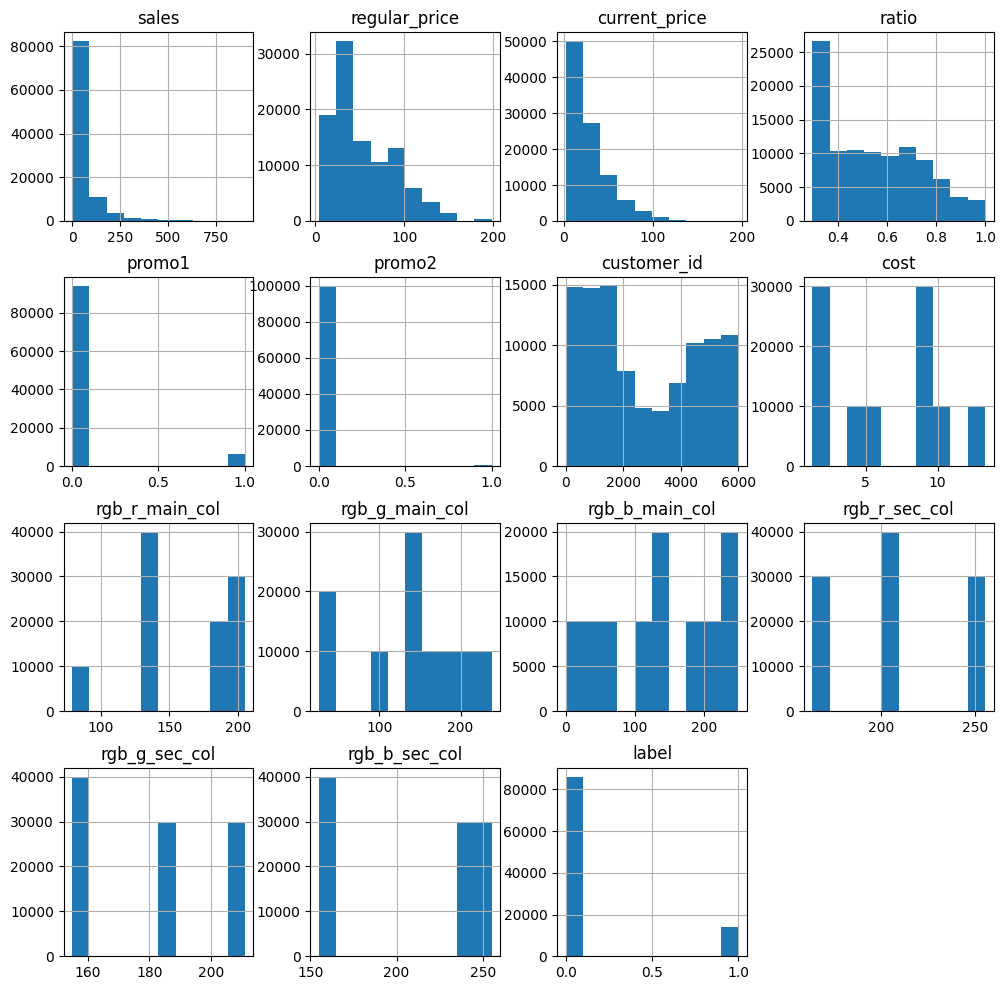

In [9]:
df.hist(figsize=(12, 12))
plt.show()

In [ ]:
df.sales.value_counts()

sales
2      3080
1      3060
3      2950
4      2800
5      2680
       ... 
720      10
599      10
543      10
433      10
432      10
Name: count, Length: 476, dtype: int64

In [10]:
df['discount'] = df['regular_price'] - df['current_price']

In [11]:
numerical_features = df.select_dtypes(exclude=['object'])

In [12]:
object_features = df.select_dtypes(include=['object'])

In [13]:
object_features.head()

,country,article,retailweek,article.1,productgroup,category,style,sizes,gender
0,Germany,YN8639,2016-03-27,OC6355,SHOES,TRAINING,slim,Size1,women
1,Germany,YN8639,2016-03-27,AP5568,SHORTS,TRAINING,regular,Size1,women
2,Germany,YN8639,2016-03-27,CB8861,HARDWARE ACCESSORIES,GOLF,regular,Size1,women
3,Germany,YN8639,2016-03-27,LI3529,SHOES,RUNNING,regular,Size1,kids
4,Germany,YN8639,2016-03-27,GG8661,SHOES,RELAX CASUAL,regular,Size1,women


In [ ]:
numerical_features.head()

,sales,regular_price,current_price,ratio,promo1,promo2,customer_id,cost,rgb_r_main_col,rgb_g_main_col,rgb_b_main_col,rgb_r_sec_col,rgb_g_sec_col,rgb_b_sec_col,label,discount
0,28,5.95,3.95,0.663866,0,0,1003.0,13.29,205,104,57,255,187,255,0,2.0
1,28,5.95,3.95,0.663866,0,0,1003.0,2.29,188,238,104,255,187,255,0,2.0
2,28,5.95,3.95,0.663866,0,0,1003.0,1.70,205,173,0,255,187,255,0,2.0
3,28,5.95,3.95,0.663866,0,0,1003.0,9.00,205,140,149,164,211,238,0,2.0
4,28,5.95,3.95,0.663866,0,0,1003.0,9.60,138,43,226,164,211,238,0,2.0


# **EDA**

In [ ]:
df.country.unique()

array(['Germany', 'Austria', 'France'], dtype=object)

# COUNTRIES


LETS Ask! What is the most popular country for our products?

In [ ]:
df.country.value_counts()

country
Germany    49400
Austria    35140
France     15460
Name: count, dtype: int64

<ipython-input-103-8e363d197804>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='country', data= df , palette='ocean')


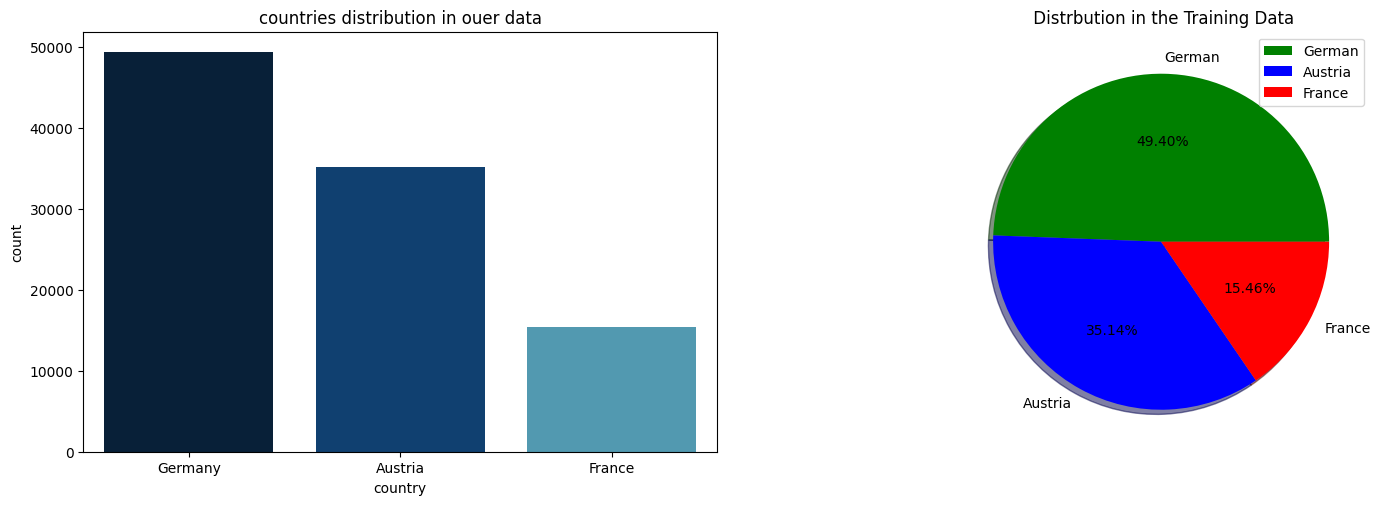

In [ ]:
plt.figure(figsize=(18,12))

plt.subplot(2,2,1)
plt.title("countries distribution in ouer data")
sns.countplot(x='country', data= df , palette='ocean')

plt.subplot(2,2,2)
g = df.country[df.country == 'Germany'].count()
a = df.country[df.country == 'Austria'].count()
f = df.country[df.country == 'France'].count()
plt.title(" Distrbution in the Training Data")
plt.pie([g, a,f], labels=['German', 'Austria','France'], autopct="%.2f%%", colors=['Green', 'blue','red'], shadow=True)
plt.legend()

plt.show()

plt.show()

plt.show()




In [ ]:
df.country.value_counts()

country
Germany    49400
Austria    35140
France     15460
Name: count, dtype: int64

([0, 1, 2],
 [Text(0, 0, 'Germany'), Text(1, 0, 'Austria'), Text(2, 0, 'France')])

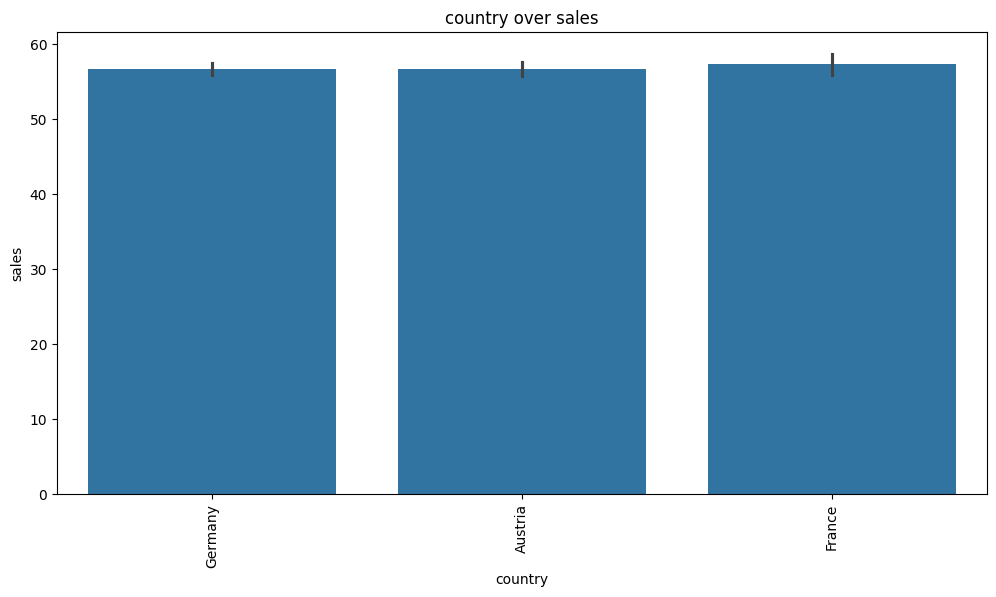

In [ ]:
plt.figure(figsize=(12, 6))
plt.title('country over sales')
sns.barplot(x='country', y="sales", data=df );
plt.xticks(rotation=90)

### We note that germany is the highest country in sales volume in a r_week

*   then germany
*   List austia



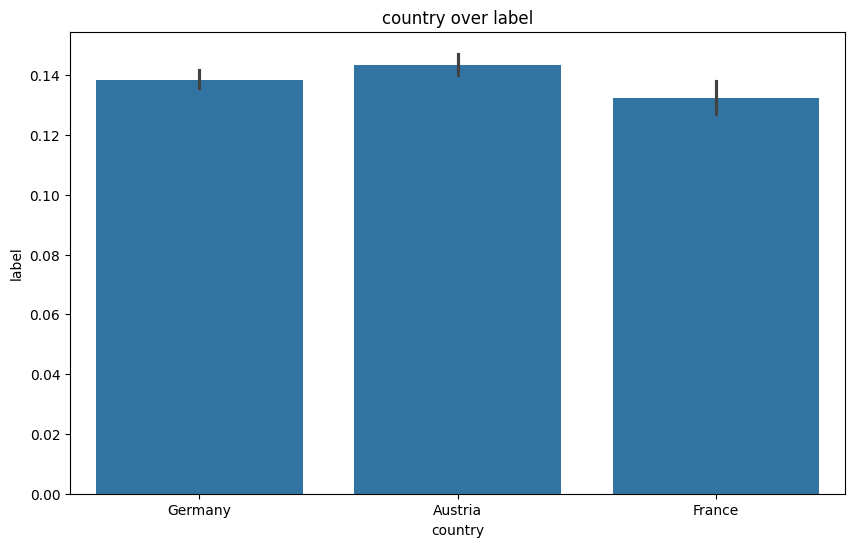

In [ ]:
plt.figure(figsize=(10,6))
plt.title('country over label')
sns.barplot(x='country', y="label", data=df );

 #### *However, we find that Austira is the country with the highest demand for purchasing products in general*




In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 25 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   country         100000 non-null  object        
 1   article         100000 non-null  object        
 2   sales           100000 non-null  int64         
 3   regular_price   100000 non-null  float64       
 4   current_price   100000 non-null  float64       
 5   ratio           100000 non-null  float64       
 6   retailweek      100000 non-null  datetime64[ns]
 7   promo1          100000 non-null  int64         
 8   promo2          100000 non-null  int64         
 9   customer_id     100000 non-null  float64       
 10  article.1       100000 non-null  object        
 11  productgroup    100000 non-null  object        
 12  category        100000 non-null  object        
 13  cost            100000 non-null  float64       
 14  style           100000 non-null  obje

## Sales ( in respective retail week)

What are the best-selling products to put more into the market and what are the least-selling products to address the problem ?

In [ ]:
df.sales.describe()

count    100000.000000
mean         56.781800
std          87.934743
min           1.000000
25%          10.000000
50%          26.000000
75%          64.000000
max         898.000000
Name: sales, dtype: float64

<ipython-input-124-5d8085367154>:3: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:green'` for the same effect.

  sns.countplot(x='sales',hue='productgroup', data=df, color='green')


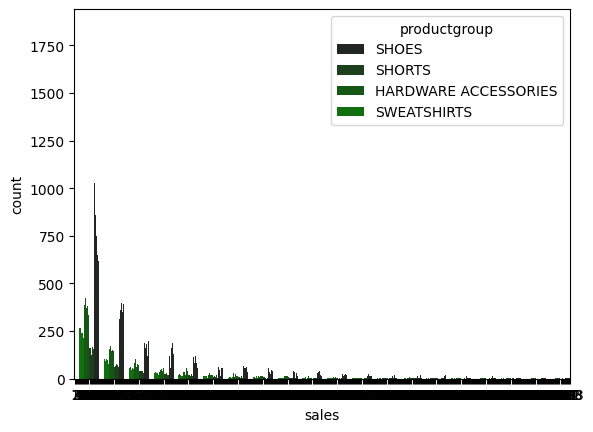

In [ ]:
#plotting the productgroup

sns.countplot(x='sales',hue='productgroup', data=df, color='green')
plt.show()

We note that the highest type of product purchased in retail week was shoes

How have sales been over the months and years?

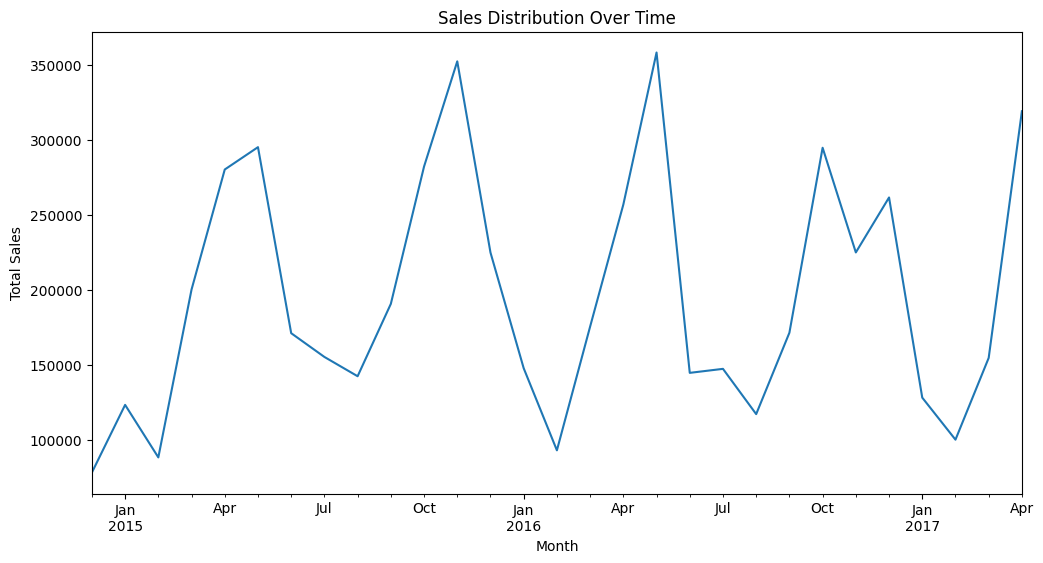

In [ ]:
#Sales over Time
plt.figure(figsize=(12, 6))
df.set_index('retailweek')['sales'].resample('M').sum().plot()
plt.title('Sales Distribution Over Time')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.show()


### we note that the highst sales rate in retail week in 2 monthes (jan16 and april16)


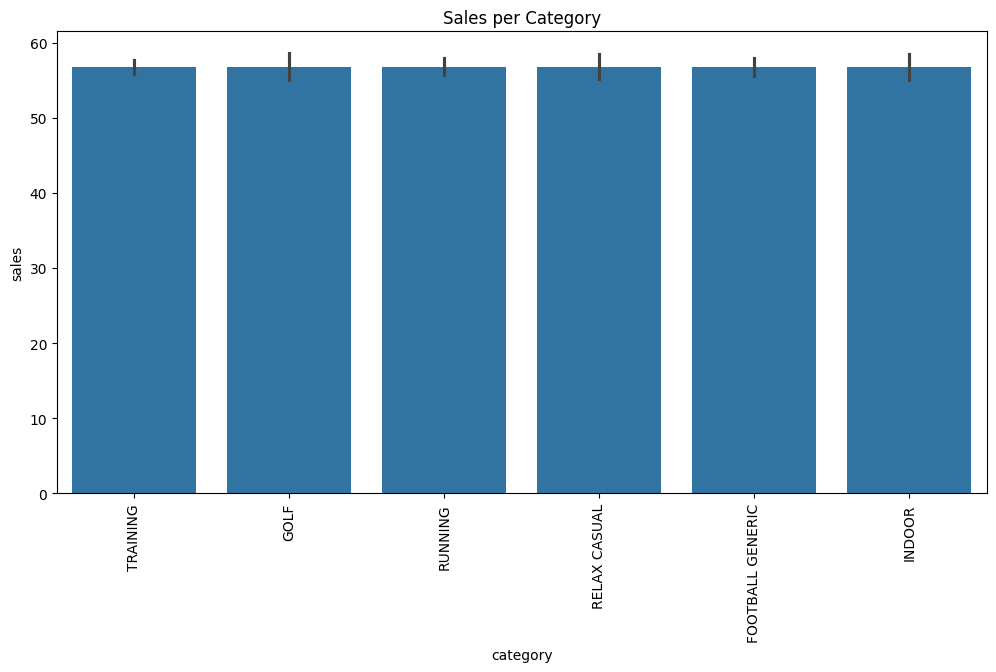

In [ ]:
 #Sales per Category
plt.figure(figsize=(12, 6))
sns.barplot(x='category', y='sales', data=df)
plt.title('Sales per Category')
plt.xticks(rotation=90)
plt.show()

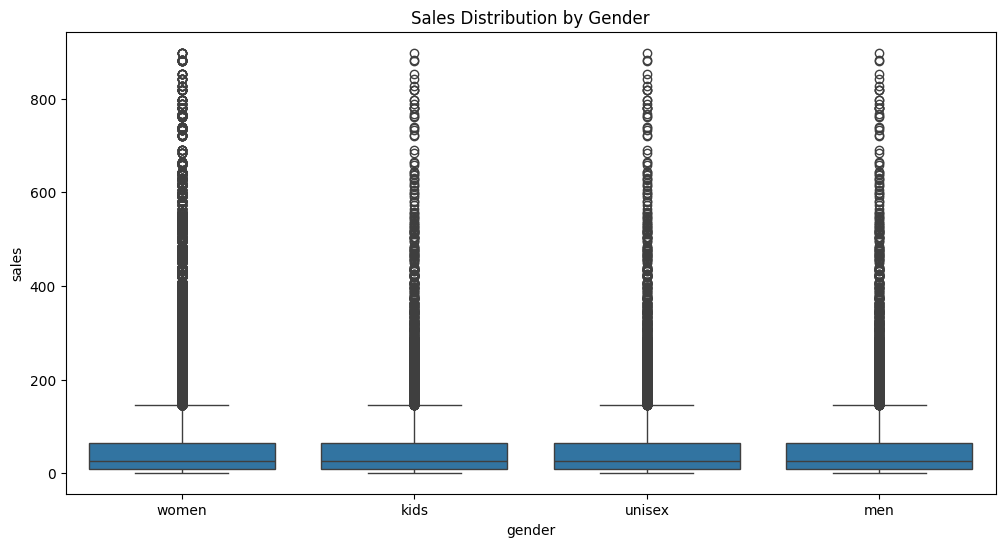

In [ ]:
# Sales Distribution by Gender
plt.figure(figsize=(12, 6))
sns.boxplot(x='gender', y='sales', data=df)
plt.title('Sales Distribution by Gender')
plt.show()

### sales over Gender

What is the most popular type of product?

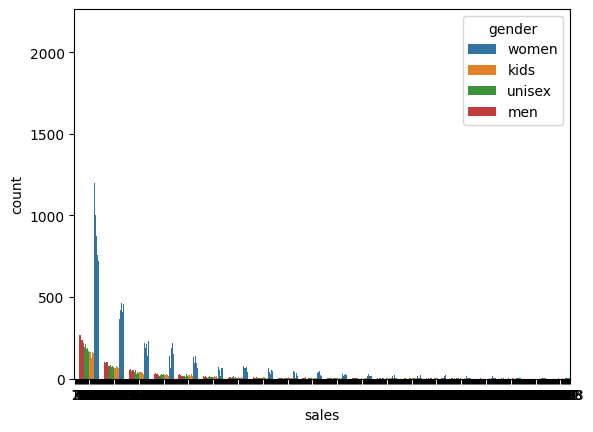

In [ ]:
sns.countplot(x='sales',hue='gender',data=df)

plt.show()


*We notice that the highest gender of purchase of products is in their respective retail week is woman*

### Regular Price

In [ ]:
df.regular_price.describe()

count    100000.000000
mean         52.391200
std          35.272128
min           3.950000
25%          25.950000
50%          40.950000
75%          79.950000
max         197.950000
Name: regular_price, dtype: float64

effict of regular salary on target

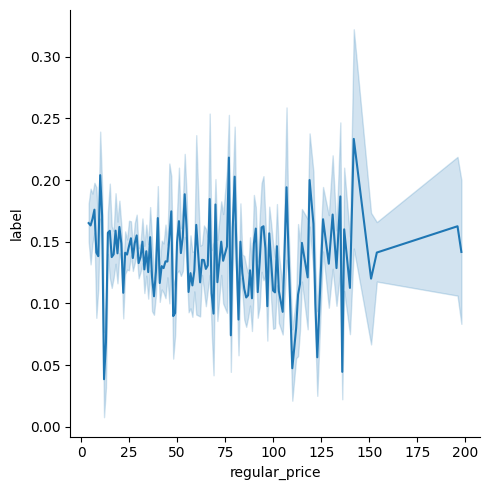

In [ ]:
sns.relplot(data=df, x="regular_price", y="label", kind="line")


In [ ]:
 plt.figure(figsize=(12, 6))
    sns.boxplot(df['regular_price'])
    plt.title('distribution of regular price')
    plt.show()

### the effict of regular price to sales

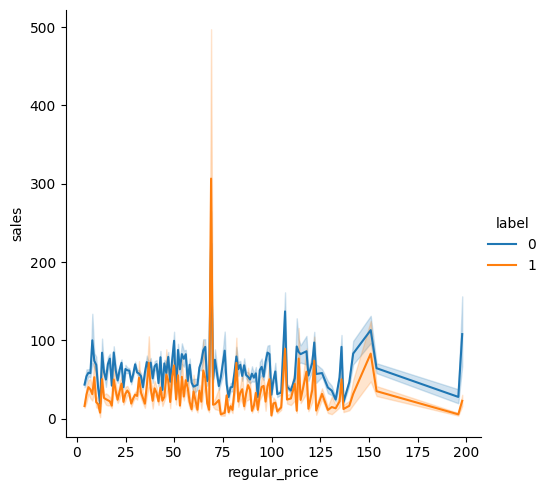

In [ ]:
sns.relplot(
    data=df, kind="line",
    x="regular_price", y="sales", hue="label",
)

## Current price

In [ ]:
df.current_price.describe()

count    100000.000000
mean         28.290800
std          22.578343
min           1.950000
25%          11.950000
50%          20.950000
75%          37.950000
max         195.950000
Name: current_price, dtype: float64

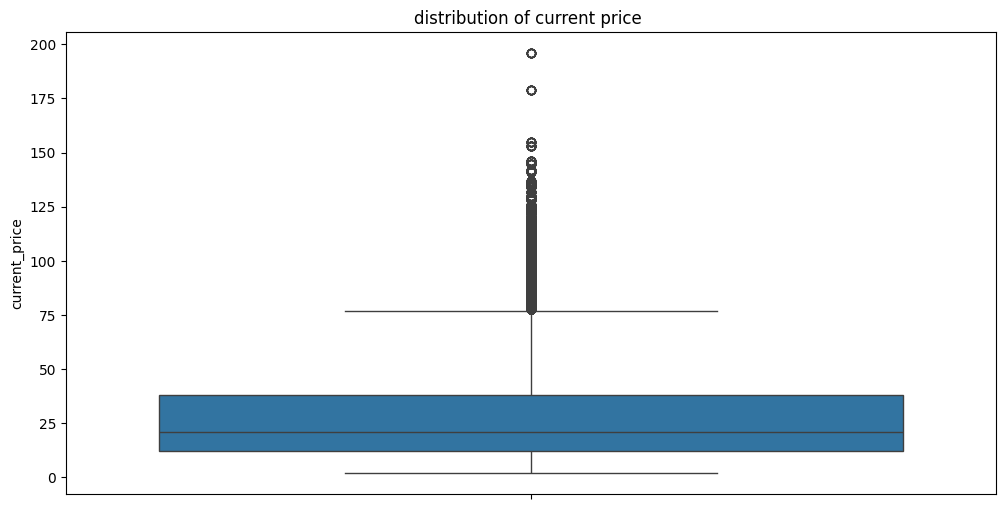

In [15]:
plt.figure(figsize=(12, 6))
sns.boxplot(df['current_price'])
plt.title('distribution of current price ')
plt.show()

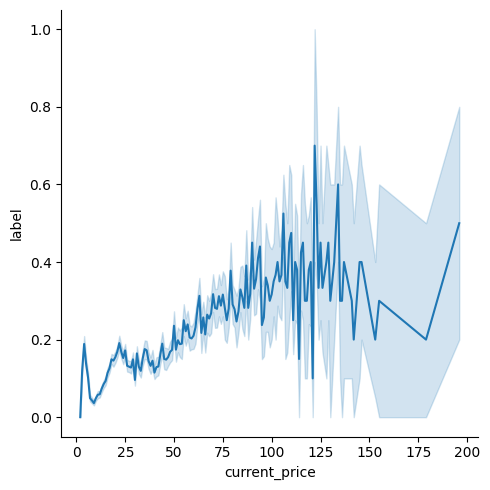

In [ ]:
# current price vs sales in ratial week
sns.relplot(data=df, x="current_price", y="label", kind="line")


**We see that sales increase relatively from the price of 80 to 200**

##*Ratio*

In [ ]:
df.ratio.describe()



count    100000.000000
mean          0.545646
std           0.194363
min           0.296482
25%           0.354839
50%           0.525044
75%           0.699248
max           1.000000
Name: ratio, dtype: float64

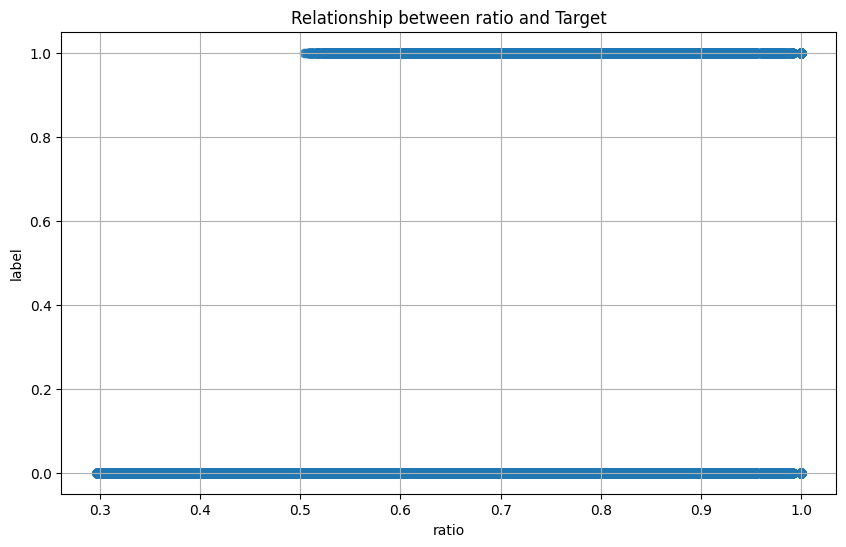

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(df['ratio'], df['label'], alpha=0.7)
plt.title('Relationship between ratio and Target')
plt.xlabel('ratio')
plt.ylabel('label')
plt.grid(True)
plt.show()

## Retailweek

In [ ]:
df.retailweek.describe()

count                        100000
mean     2016-02-25 04:31:52.320000
min             2014-12-28 00:00:00
25%             2015-07-26 00:00:00
50%             2016-02-21 00:00:00
75%             2016-10-02 00:00:00
max             2017-04-30 00:00:00
Name: retailweek, dtype: object

In [ ]:
df.retailweek= pd.to_datetime(df.retailweek)

In [ ]:
yearofrweek = df['retailweek'].dt.year
yearofrweek.value_counts()

retailweek
2015    42790
2016    41830
2017    14600
2014      780
Name: count, dtype: int64

In [ ]:
df.columns

Index(['country', 'article', 'sales', 'regular_price', 'current_price',
       'ratio', 'retailweek', 'promo1', 'promo2', 'customer_id', 'article.1',
       'productgroup', 'category', 'cost', 'style', 'sizes', 'gender',
       'rgb_r_main_col', 'rgb_g_main_col', 'rgb_b_main_col', 'rgb_r_sec_col',
       'rgb_g_sec_col', 'rgb_b_sec_col', 'label'],
      dtype='object')

([0, 1, 2, 3],
 [Text(0, 0, '2014'),
  Text(1, 0, '2015'),
  Text(2, 0, '2016'),
  Text(3, 0, '2017')])

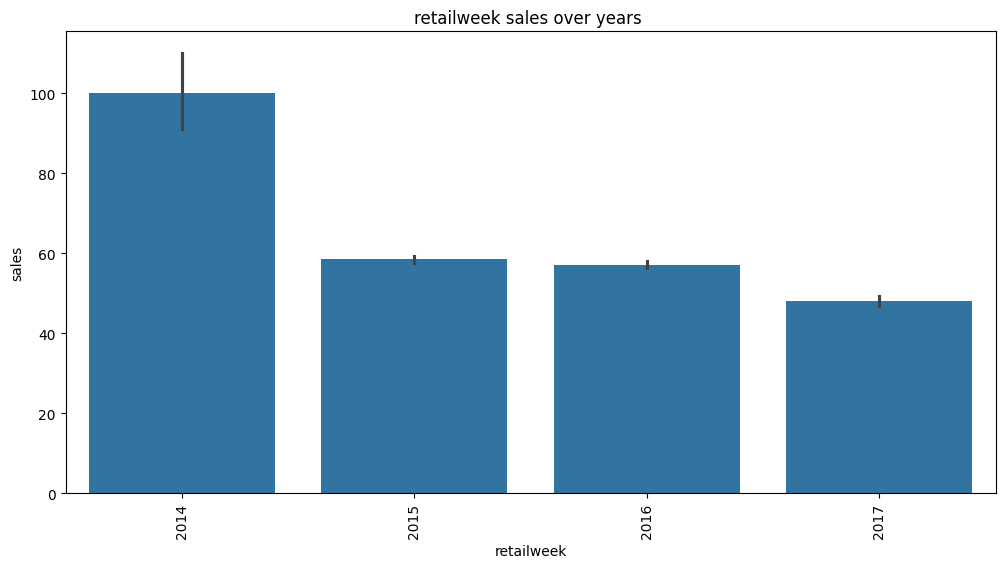

In [ ]:
plt.figure(figsize=(12, 6))
plt.title('retailweek sales over years ')
sns.barplot(x= yearofrweek, y="sales", data=df );
plt.xticks(rotation=90)

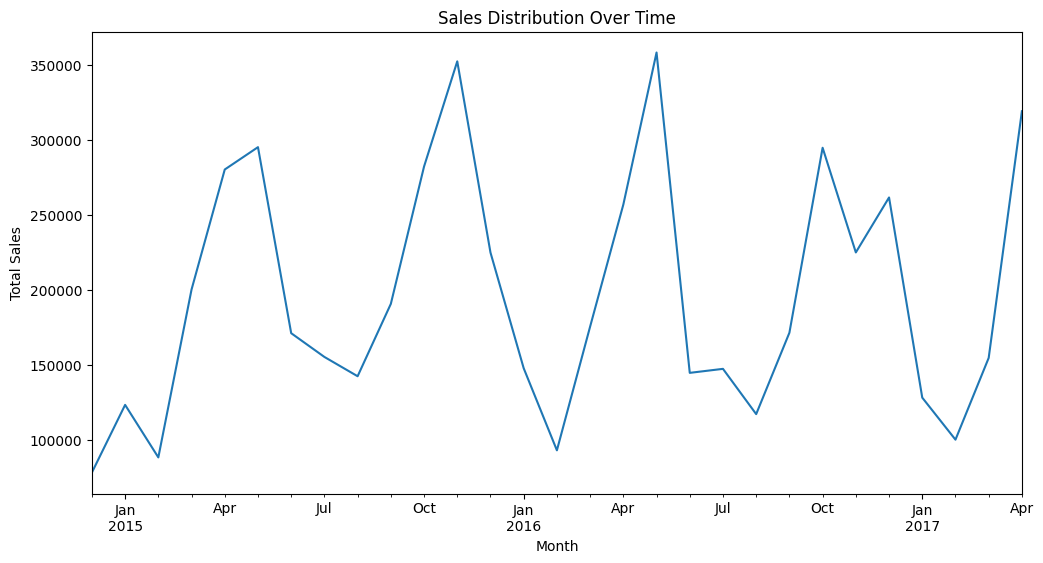

In [ ]:
plt.figure(figsize=(12, 6))
df.set_index('retailweek')['sales'].resample('M').sum().plot()
plt.title('Sales Distribution Over Time')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.show()
### we note that the highst sales rate in 2 monthes (jan16 and april16)


<ipython-input-123-137911824183>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x= yearofrweek, y="label", data=df, palette=color );


([0, 1, 2, 3],
 [Text(0, 0, '2014'),
  Text(1, 0, '2015'),
  Text(2, 0, '2016'),
  Text(3, 0, '2017')])

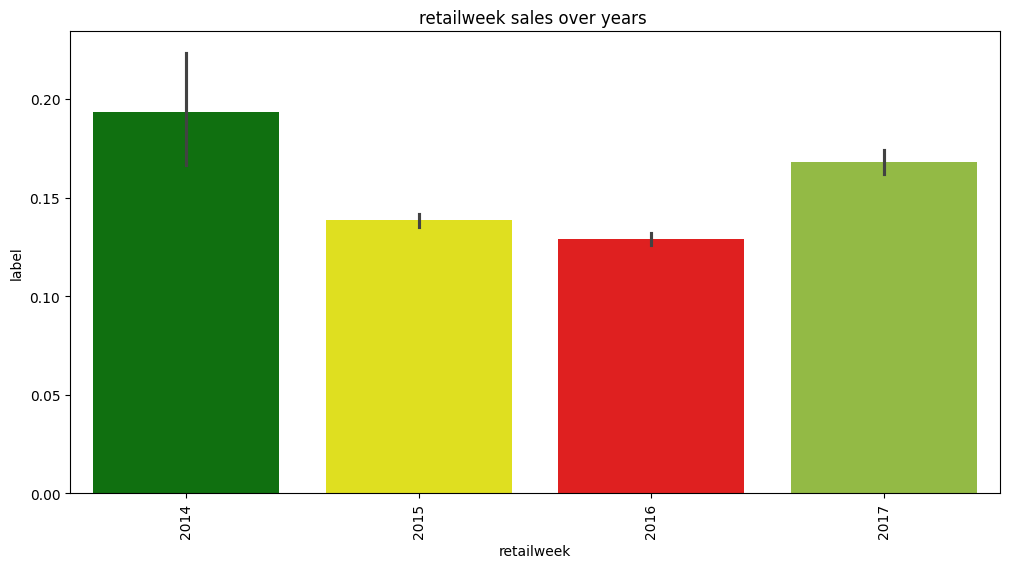

In [ ]:
plt.figure(figsize=(12, 6))
plt.title('retailweek sales over years ')
color=['green', '#ffff00', 'red', '#9ACD32']
sns.barplot(x= yearofrweek, y="label", data=df, palette=color );

plt.xticks(rotation=90)

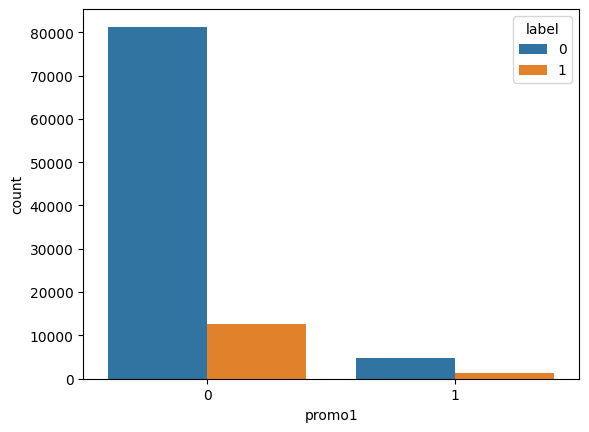

In [ ]:
df.promo1.value_counts()
sns.countplot(x='promo1',hue='label',data=df)
plt.show()

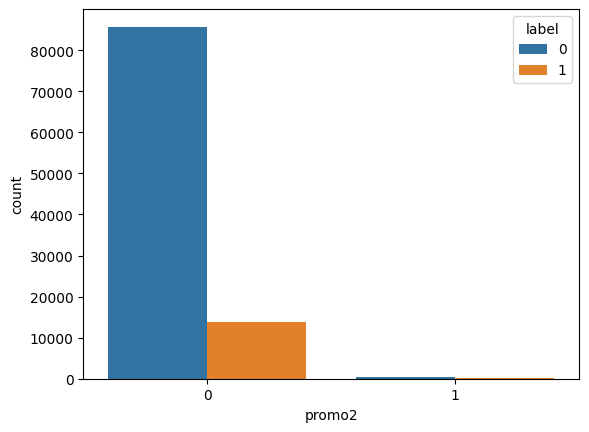

In [ ]:
df.promo1.value_counts()
sns.countplot(x='promo2',hue='label',data=df)
plt.show()

here we finde unpalnced data in ( promo1,promo2 ) , so we'll drop this columns
But let's postpone this step until we see the impact of the two columns on the target.

In [16]:
df.customer_id.value_counts()


customer_id
1692.0    80
1264.0    80
1111.0    80
1240.0    70
22.0      70
          ..
1819.0    10
5375.0    10
2565.0    10
4296.0    10
5431.0    10
Name: count, Length: 4549, dtype: int64

**We can find that the customer whose Customer ID = 1692 has the highest participation in purchasing products from the company**

#### **Artical1 distribution**

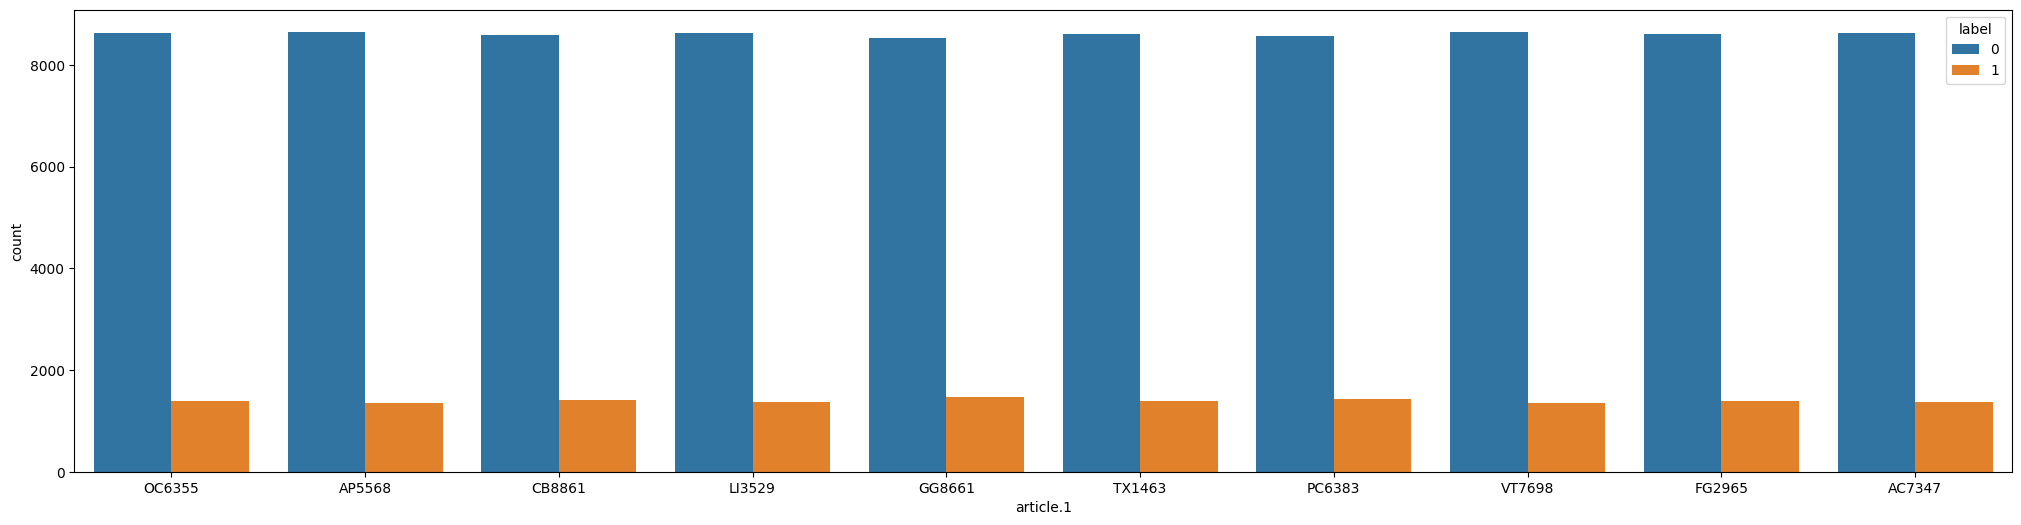

In [ ]:
plt.figure(figsize=(25, 6))
df['article.1'].value_counts()
sns.countplot(x='article.1',hue='label',data=df)
plt.show()

In [ ]:
df.productgroup.value_counts()

productgroup
SHOES                   60000
HARDWARE ACCESSORIES    20000
SHORTS                  10000
SWEATSHIRTS             10000
Name: count, dtype: int64

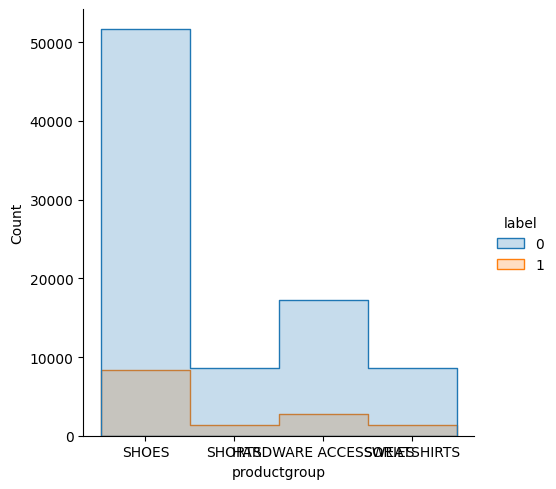

In [ ]:
sns.displot(df, x="productgroup", hue="label", element="step")


**As shown shoes are the best selling products**

In [ ]:
df.category.value_counts()

category
TRAINING            30000
RUNNING             20000
FOOTBALL GENERIC    20000
GOLF                10000
RELAX CASUAL        10000
INDOOR              10000
Name: count, dtype: int64

<Figure size 2000x600 with 0 Axes>

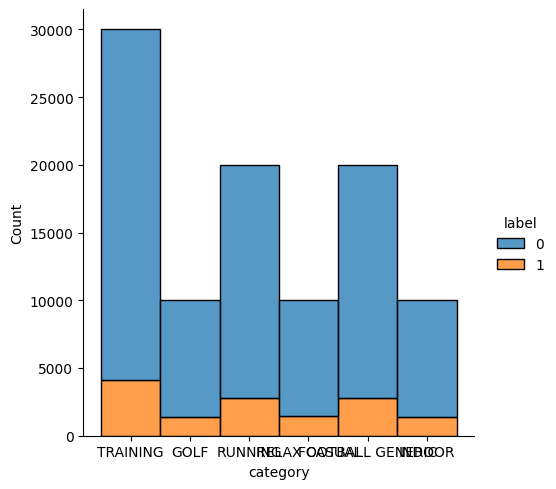

In [ ]:
plt.figure(figsize=(20, 6))
sns.displot(df, x="category", hue="label", multiple="stack")
plt.show()

**We also see that the training category is the highest offered and the highest sold as well**

-------------------------------------------------------

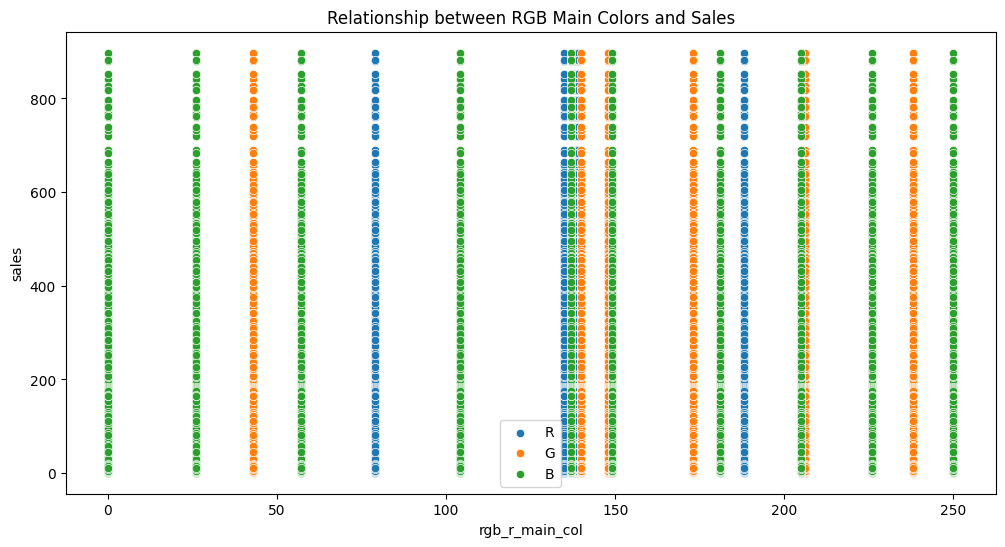

In [ ]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x='rgb_r_main_col', y='sales', data=df, label='R')
sns.scatterplot(x='rgb_g_main_col', y='sales', data=df, label='G')
sns.scatterplot(x='rgb_b_main_col', y='sales', data=df, label='B')
plt.title('Relationship between RGB Main Colors and Sales')
plt.legend()
plt.show()

# **Gender**

In [ ]:
df.gender.value_counts()

gender
women     70000
kids      10000
unisex    10000
men       10000
Name: count, dtype: int64

<Figure size 2000x600 with 0 Axes>

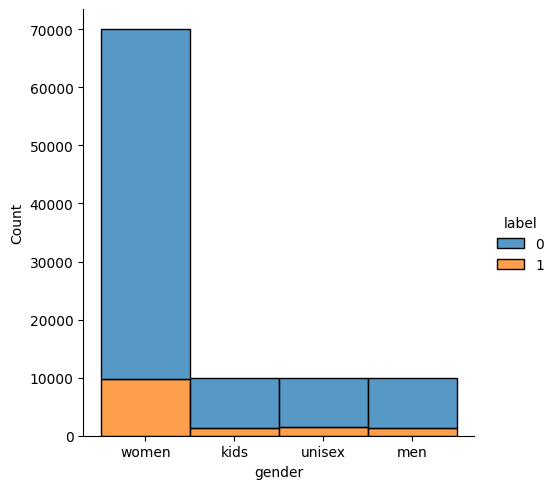

In [ ]:
plt.figure(figsize=(20, 6))
sns.displot(df, x="gender", hue="label", multiple="stack")
plt.show()

"Despite the imbalance in the data, women are the highest in attendance and purchases."
followed by gays, then  kides, then men

# **Sizes**

In [ ]:
df.sizes.value_counts()

sizes
Size1    90000
Size2    10000
Name: count, dtype: int64

<Figure size 2000x600 with 0 Axes>

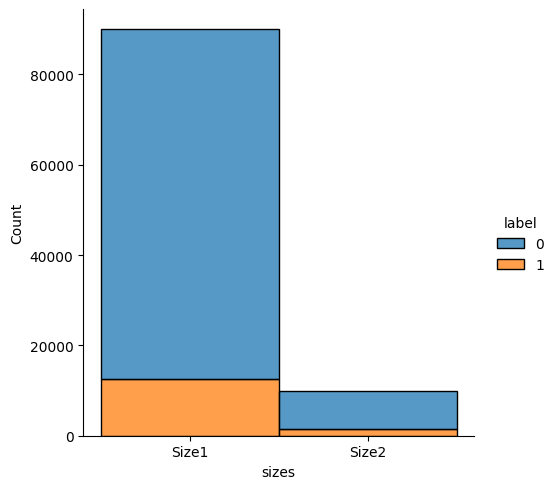

In [ ]:
plt.figure(figsize=(20, 6))
sns.displot(df, x="sizes", hue="label", multiple="stack")
plt.show()

# **Target (label)**

<ipython-input-63-1098d054284c>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='label', data=df , palette = colors )


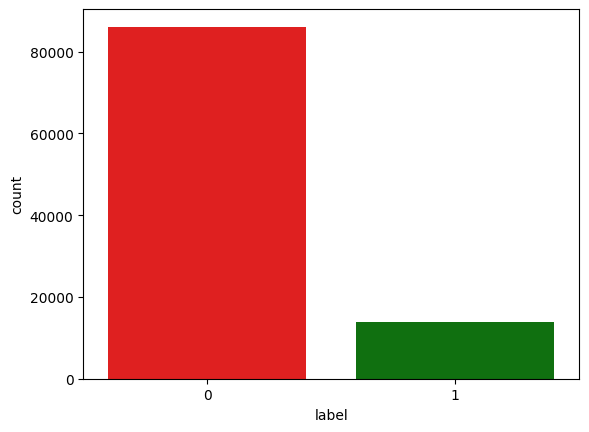

In [ ]:
df.label.value_counts()
colors=['red', 'green']
sns.countplot(x='label', data=df , palette = colors )
plt.show()

*We notice that there is unbalanced data in this column, which will negatively affect the training of the machine learning model*

Here we have two solutions
*   **oversampling**
*   **undersampling**

But I prefer **oversampling**

-- But let's postpone this step for now..

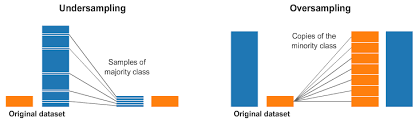

-- But let's postpone this step for now..


### Correlation Matrix for numerical data

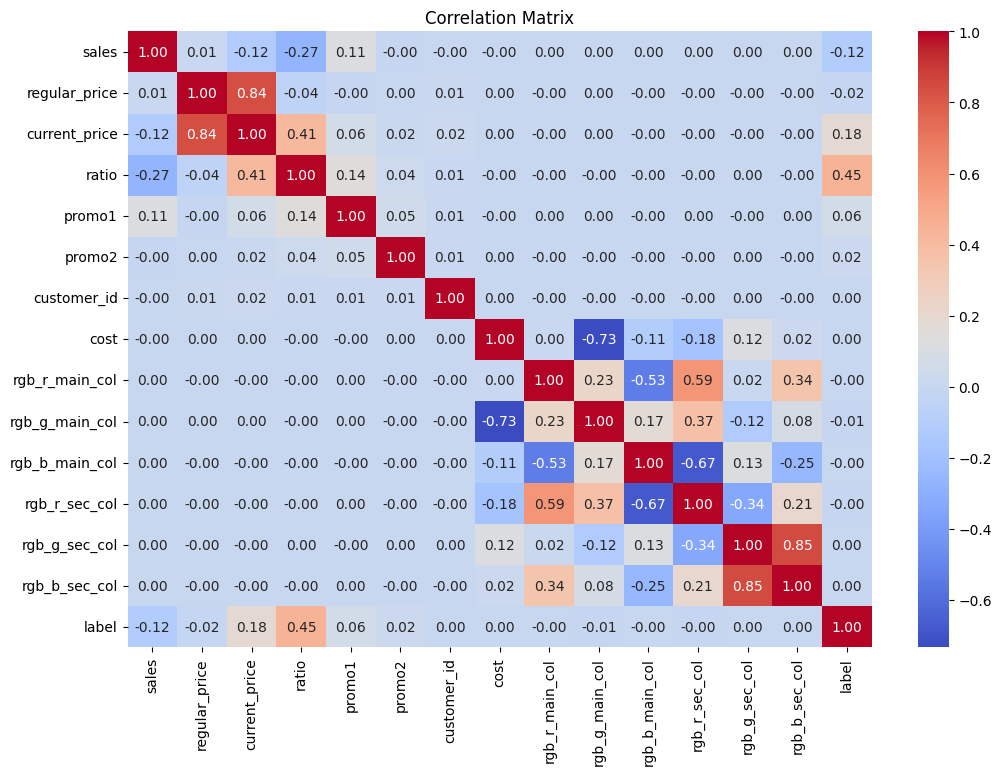

In [ ]:
plt.figure(figsize=(12, 8))
corr_matrix = numerical_features.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

We note that the following columns do not affect the target at all ( Customrtid, cost, rpb_[r,b]_main_col ,rpb_[r,b]_sec_col

## **Outliers in our Data**

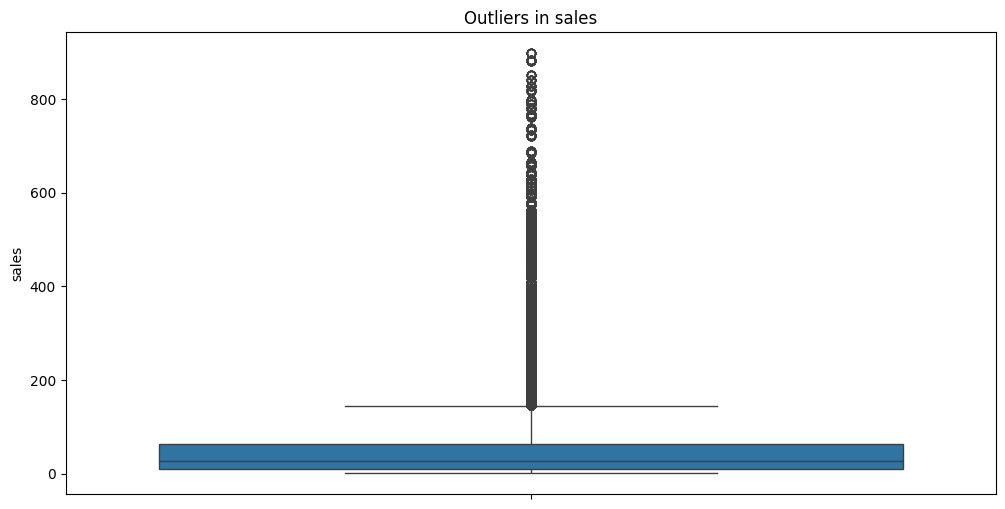

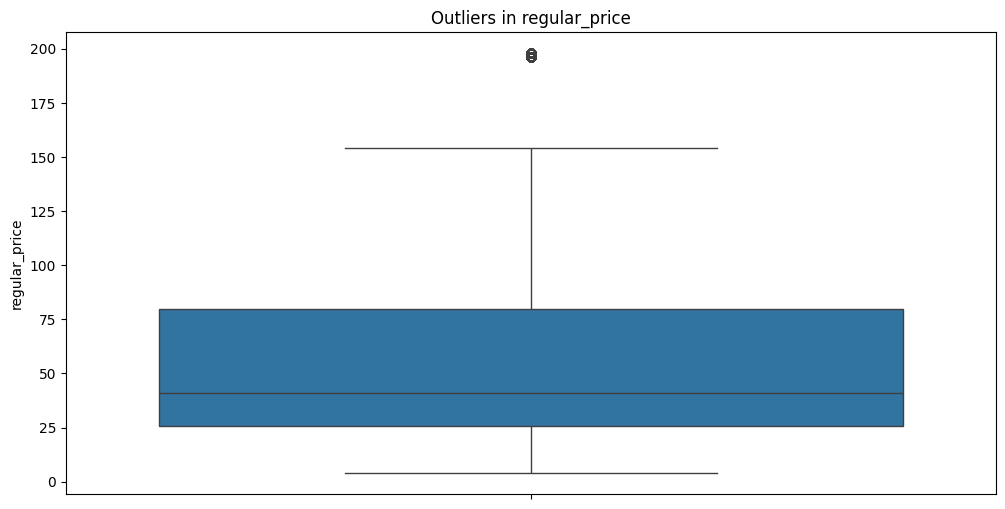

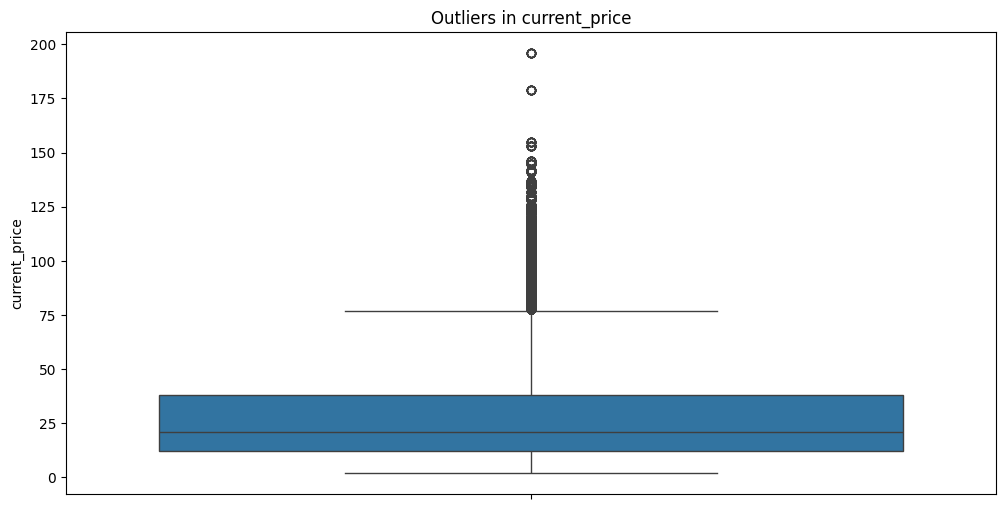

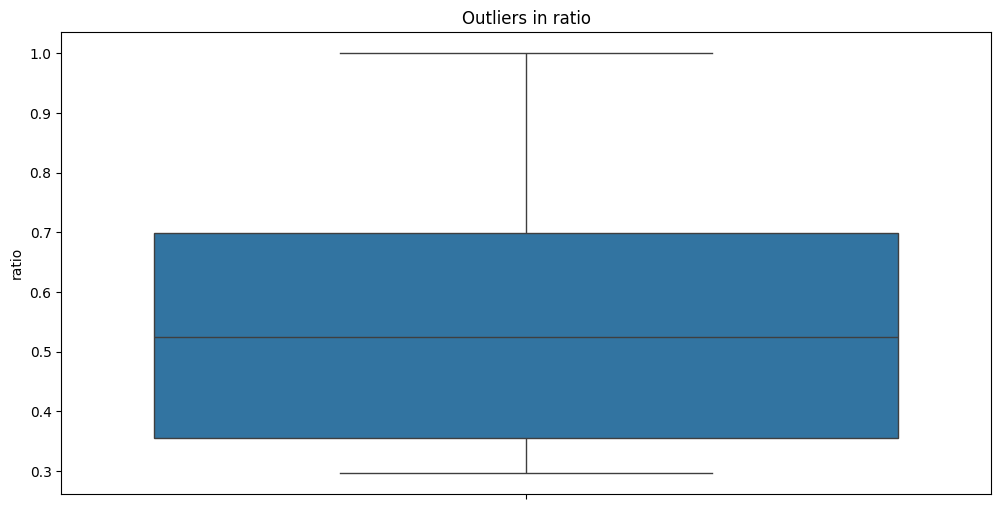

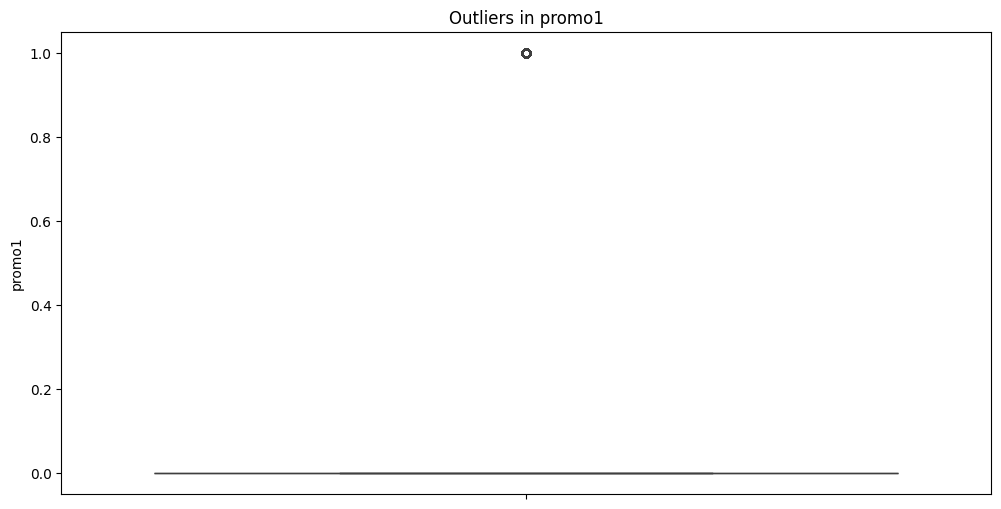

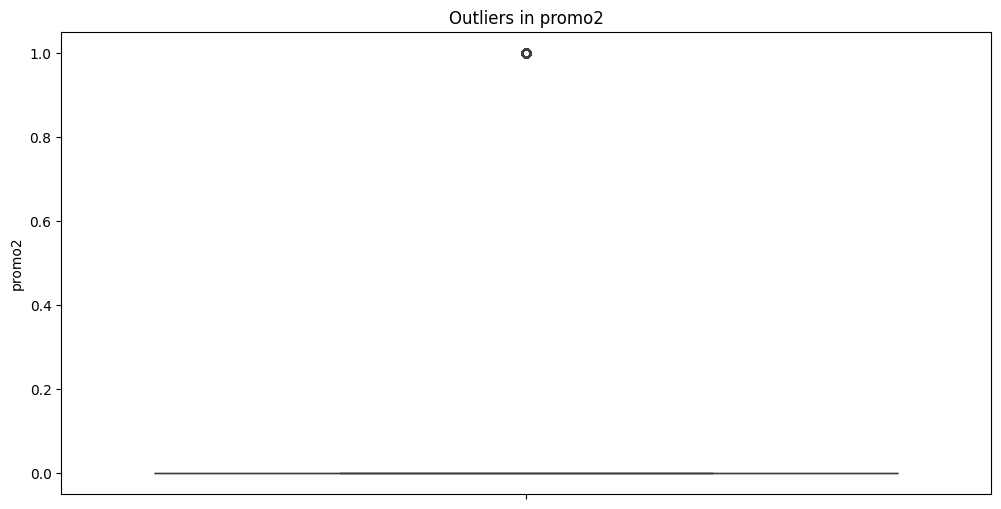

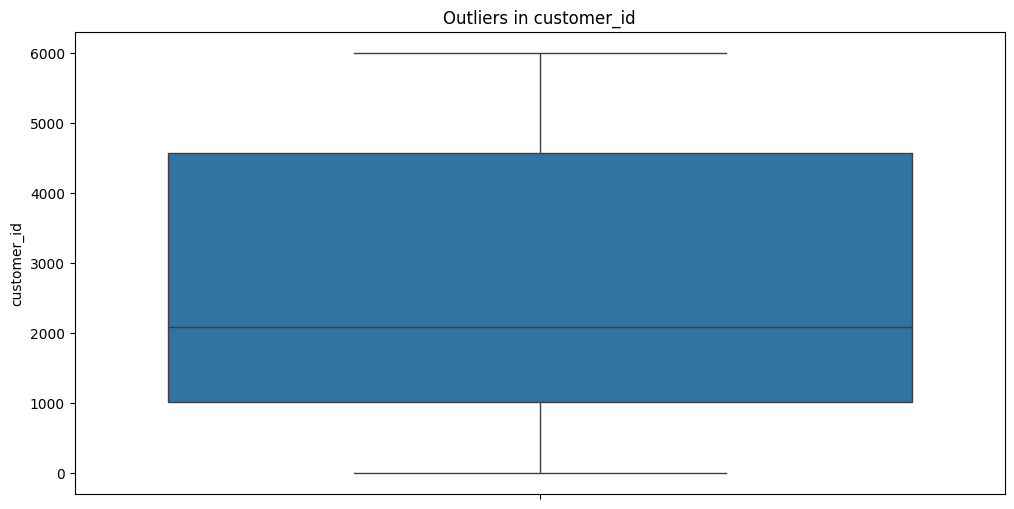

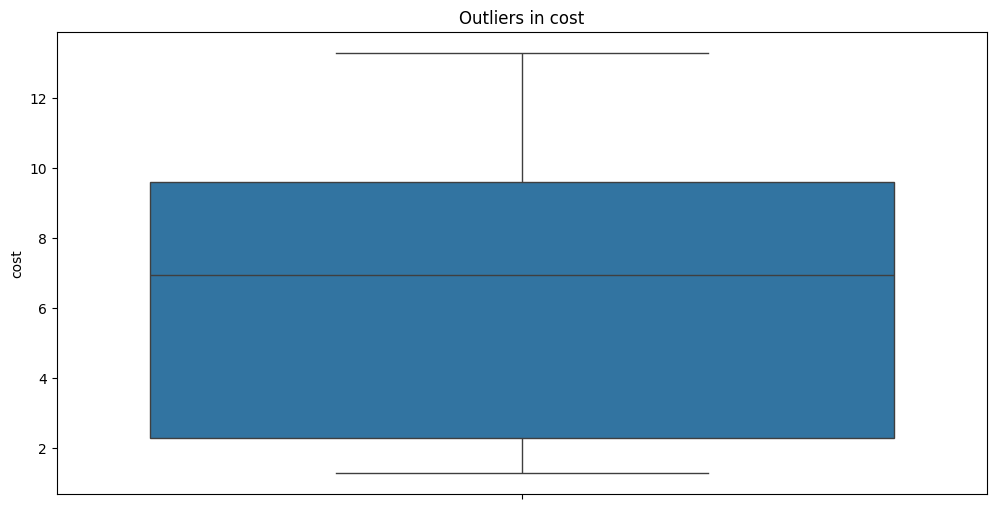

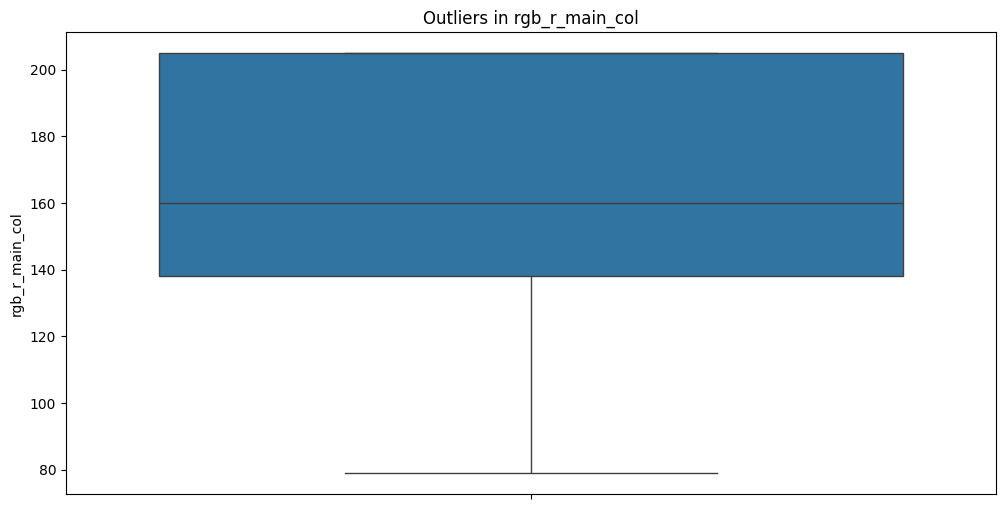

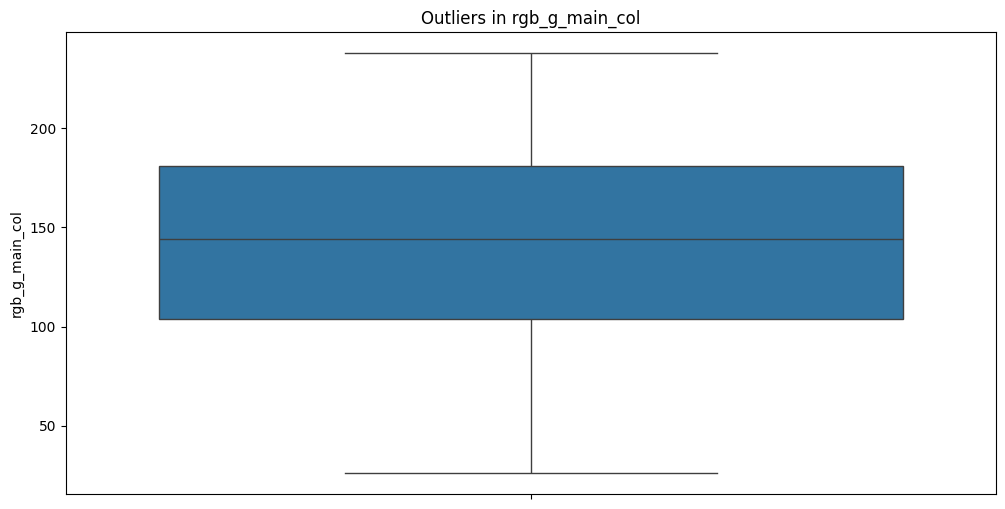

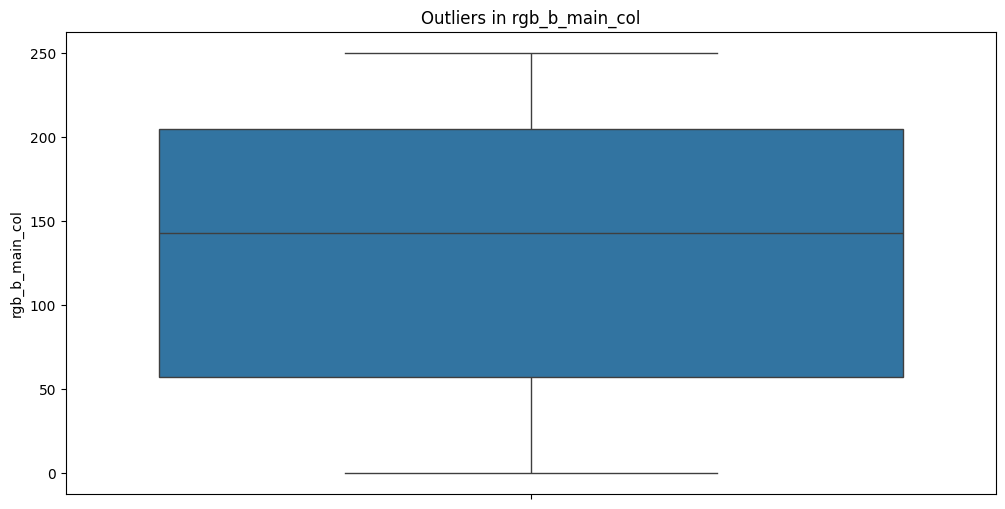

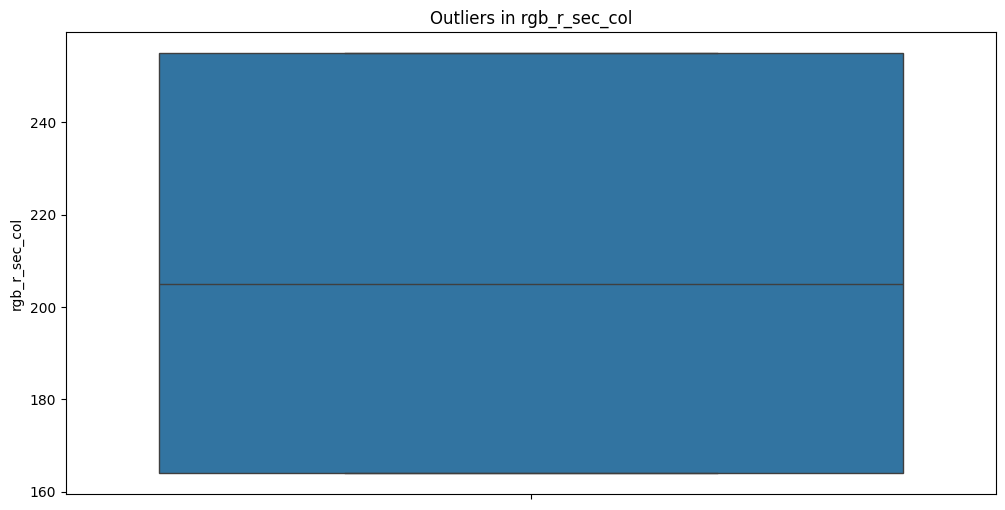

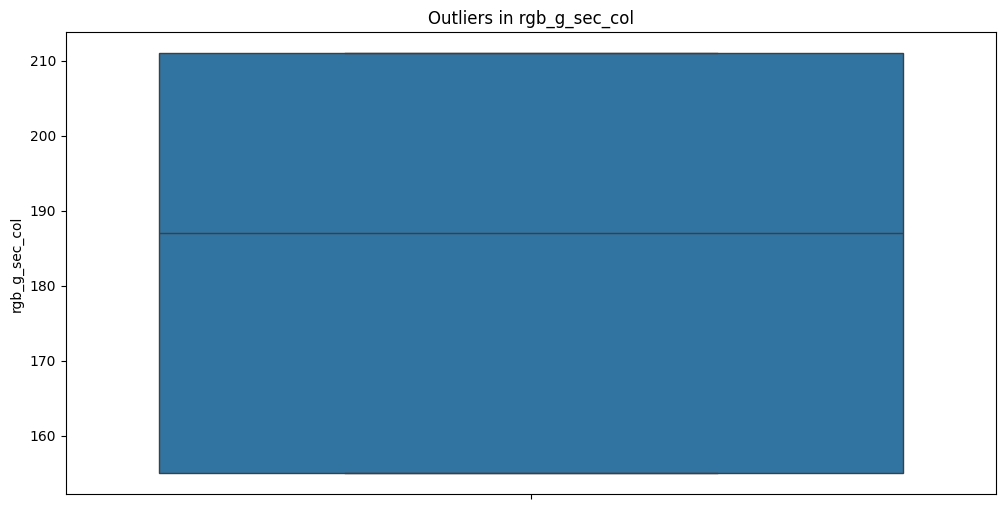

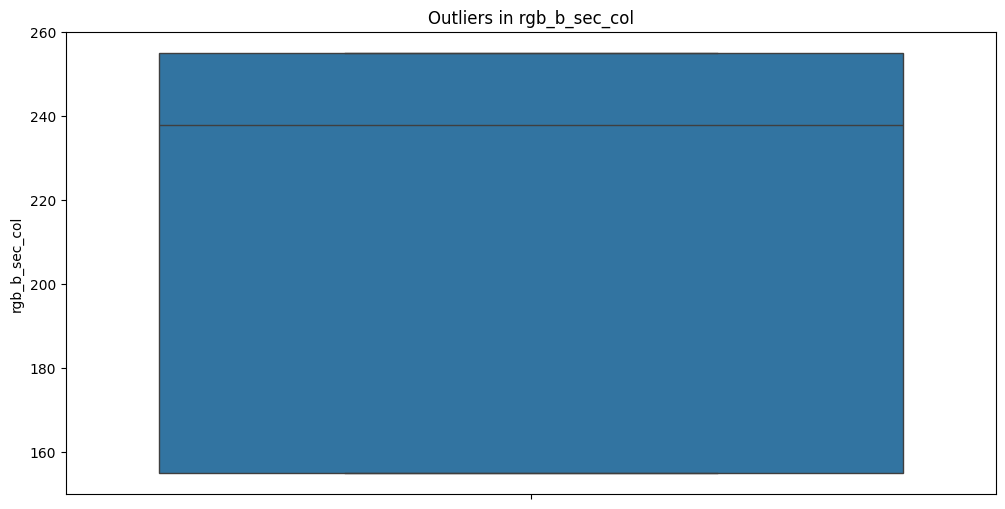

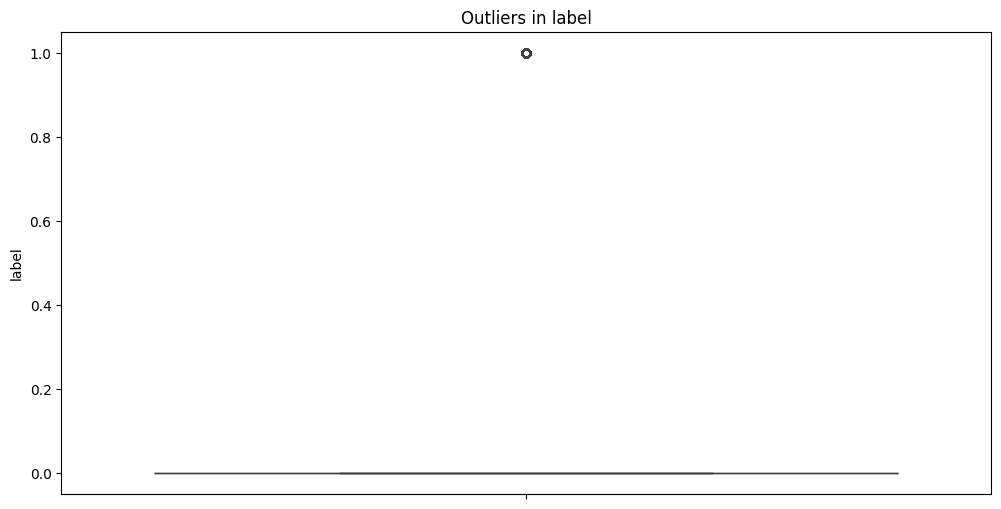

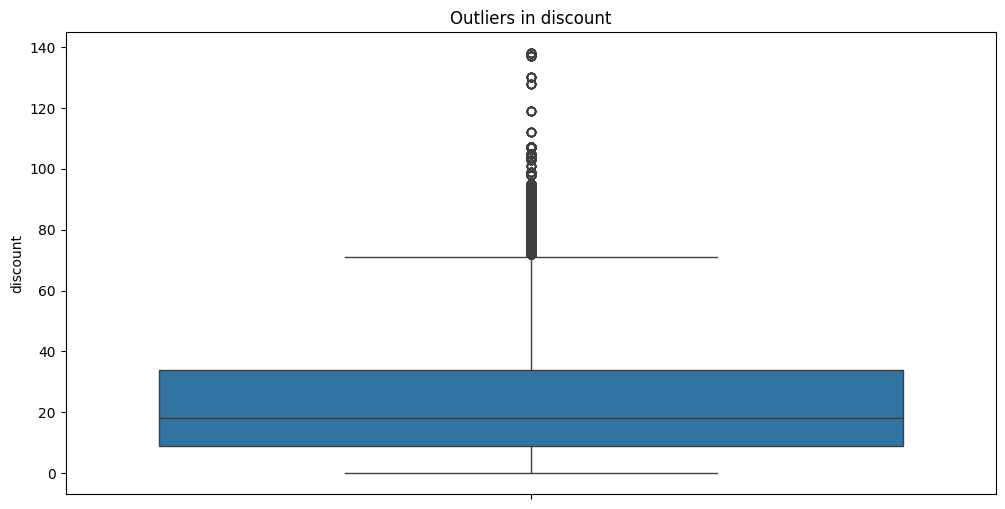

In [ ]:
 ##Outliers Detection
for feature in numerical_features:
    plt.figure(figsize=(12, 6))
    sns.boxplot(df[feature])
    plt.title(f'Outliers in {feature}')
    plt.show()

**Removing outliers using IQR**

In [17]:
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Remove outliers from the nmerical columns
data_clean = remove_outliers_iqr(df, numerical_features.columns)

In [18]:
object_features

,country,article,retailweek,article.1,productgroup,category,style,sizes,gender
0,Germany,YN8639,2016-03-27,OC6355,SHOES,TRAINING,slim,Size1,women
1,Germany,YN8639,2016-03-27,AP5568,SHORTS,TRAINING,regular,Size1,women
2,Germany,YN8639,2016-03-27,CB8861,HARDWARE ACCESSORIES,GOLF,regular,Size1,women
3,Germany,YN8639,2016-03-27,LI3529,SHOES,RUNNING,regular,Size1,kids
4,Germany,YN8639,2016-03-27,GG8661,SHOES,RELAX CASUAL,regular,Size1,women
...,...,...,...,...,...,...,...,...,...
99995,Germany,PW6278,2016-06-26,TX1463,SWEATSHIRTS,TRAINING,wide,Size1,women
99996,Germany,PW6278,2016-06-26,PC6383,SHOES,FOOTBALL GENERIC,wide,Size2,unisex
99997,Germany,PW6278,2016-06-26,VT7698,SHOES,INDOOR,wide,Size1,women
99998,Germany,PW6278,2016-06-26,FG2965,HARDWARE ACCESSORIES,RUNNING,slim,Size1,women


# Encoding our object data

In [19]:
label_encoders = {}
for column in object_features:
    label_encoders[column] = LabelEncoder()
    df[column] = label_encoders[column].fit_transform(df[column])

In [20]:
df

,country,article,sales,regular_price,current_price,ratio,retailweek,promo1,promo2,customer_id,...,sizes,gender,rgb_r_main_col,rgb_g_main_col,rgb_b_main_col,rgb_r_sec_col,rgb_g_sec_col,rgb_b_sec_col,label,discount
0,2,444,28,5.95,3.95,0.663866,65,0,0,1003.0,...,0,3,205,104,57,255,187,255,0,2.0
1,2,444,28,5.95,3.95,0.663866,65,0,0,1003.0,...,0,3,188,238,104,255,187,255,0,2.0
2,2,444,28,5.95,3.95,0.663866,65,0,0,1003.0,...,0,3,205,173,0,255,187,255,0,2.0
3,2,444,28,5.95,3.95,0.663866,65,0,0,1003.0,...,0,0,205,140,149,164,211,238,0,2.0
4,2,444,28,5.95,3.95,0.663866,65,0,0,1003.0,...,0,3,138,43,226,164,211,238,0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,2,275,227,57.95,26.95,0.465056,78,0,0,1489.0,...,0,3,79,148,205,164,211,238,0,31.0
99996,2,275,227,57.95,26.95,0.465056,78,0,0,1489.0,...,1,2,139,26,26,205,155,155,0,31.0
99997,2,275,227,57.95,26.95,0.465056,78,0,0,1489.0,...,0,3,135,206,250,205,155,155,0,31.0
99998,2,275,227,57.95,26.95,0.465056,78,0,0,1489.0,...,0,3,181,181,181,205,155,155,0,31.0


# **Correlation Matrix between all data**

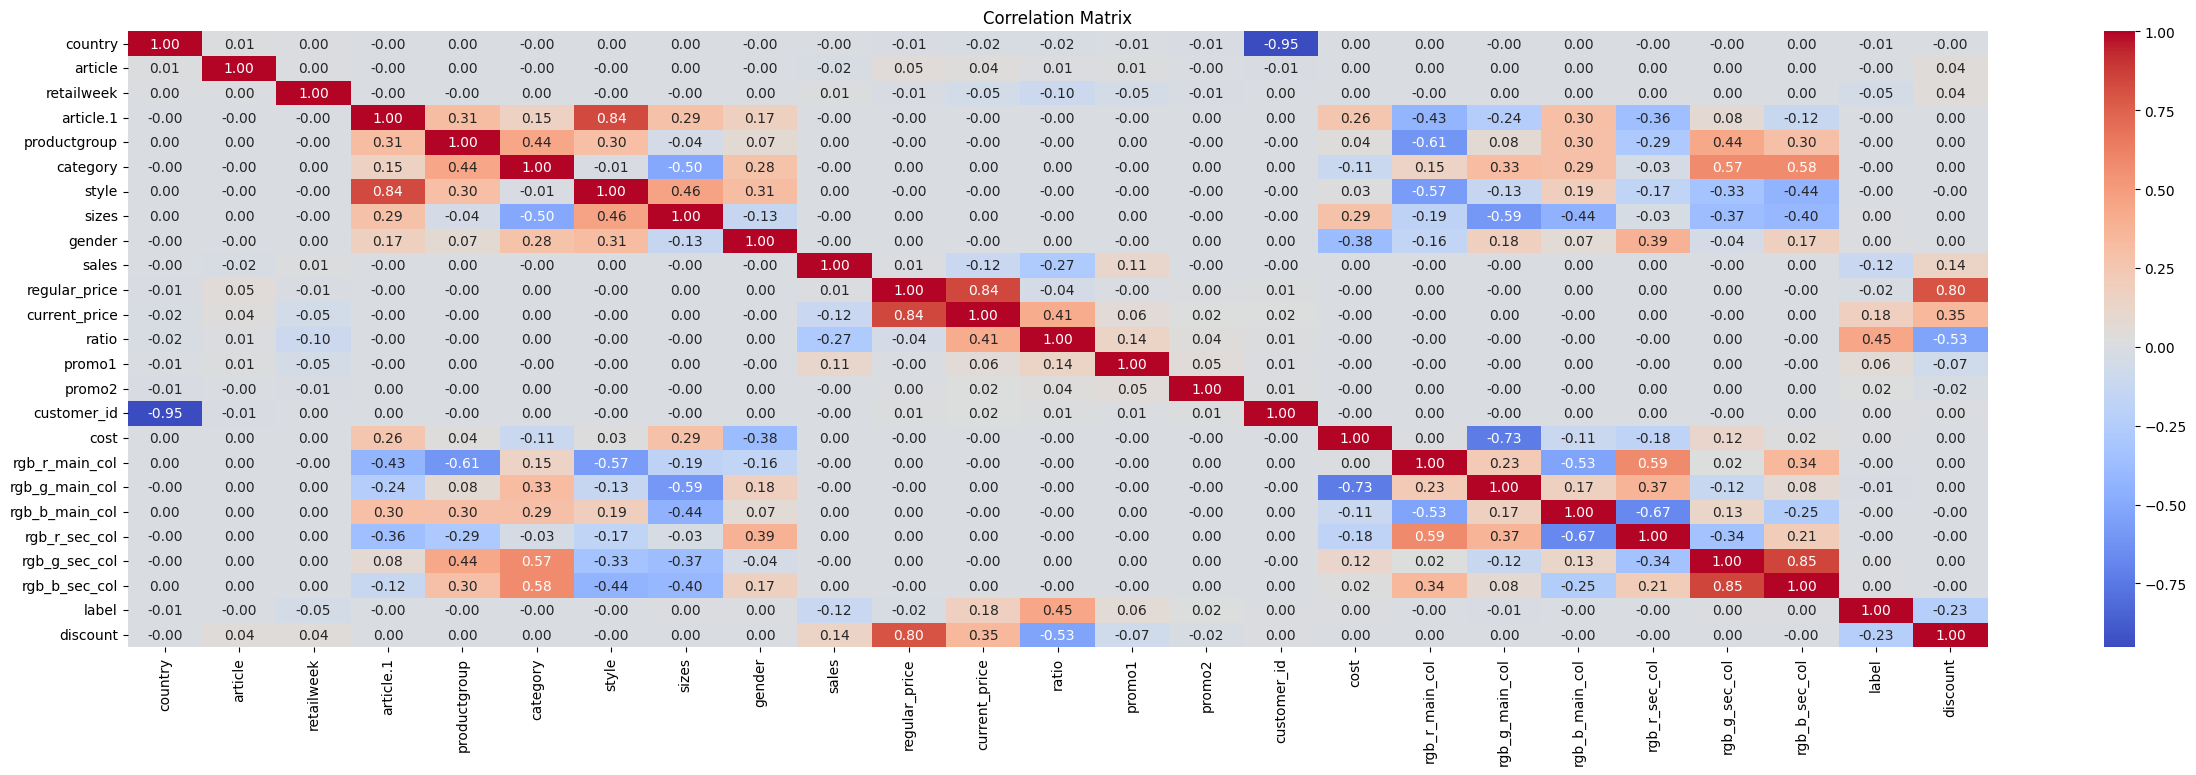

In [ ]:
plt.figure(figsize=(30, 8))
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

# **Numerical Feature Scaling**

In [21]:
Target = numerical_features.label
Target

0        0
1        0
2        0
3        0
4        0
        ..
99995    0
99996    0
99997    0
99998    0
99999    0
Name: label, Length: 100000, dtype: int64

In [22]:
numerical_features

,sales,regular_price,current_price,ratio,promo1,promo2,customer_id,cost,rgb_r_main_col,rgb_g_main_col,rgb_b_main_col,rgb_r_sec_col,rgb_g_sec_col,rgb_b_sec_col,label,discount
0,28,5.95,3.95,0.663866,0,0,1003.0,13.29,205,104,57,255,187,255,0,2.0
1,28,5.95,3.95,0.663866,0,0,1003.0,2.29,188,238,104,255,187,255,0,2.0
2,28,5.95,3.95,0.663866,0,0,1003.0,1.70,205,173,0,255,187,255,0,2.0
3,28,5.95,3.95,0.663866,0,0,1003.0,9.00,205,140,149,164,211,238,0,2.0
4,28,5.95,3.95,0.663866,0,0,1003.0,9.60,138,43,226,164,211,238,0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,227,57.95,26.95,0.465056,0,0,1489.0,4.20,79,148,205,164,211,238,0,31.0
99996,227,57.95,26.95,0.465056,0,0,1489.0,9.90,139,26,26,205,155,155,0,31.0
99997,227,57.95,26.95,0.465056,0,0,1489.0,5.20,135,206,250,205,155,155,0,31.0
99998,227,57.95,26.95,0.465056,0,0,1489.0,1.29,181,181,181,205,155,155,0,31.0


In [23]:
scaler = StandardScaler()

numerical_features_scaled = scaler.fit_transform(numerical_features)

In [24]:
numerical_features_scaled = pd.DataFrame(numerical_features_scaled, columns=numerical_features.columns)
numerical_features_scaled

,sales,regular_price,current_price,ratio,promo1,promo2,customer_id,cost,rgb_r_main_col,rgb_g_main_col,rgb_b_main_col,rgb_r_sec_col,rgb_g_sec_col,rgb_b_sec_col,label,discount
0,-0.327310,-1.316661,-1.078065,0.608245,-0.256874,-0.070172,-0.900764,1.730142,1.095754,-0.559383,-0.942718,1.339449,0.238559,0.995439,-0.402266,-1.085512
1,-0.327310,-1.316661,-1.078065,0.608245,-0.256874,-0.070172,-0.900764,-1.079774,0.668511,1.546161,-0.363532,1.339449,0.238559,0.995439,-0.402266,-1.085512
2,-0.327310,-1.316661,-1.078065,0.608245,-0.256874,-0.070172,-0.900764,-1.230488,1.095754,0.524815,-1.645136,1.339449,0.238559,0.995439,-0.402266,-1.085512
3,-0.327310,-1.316661,-1.078065,0.608245,-0.256874,-0.070172,-0.900764,0.634275,1.095754,0.006285,0.191008,-1.237504,1.260957,0.620218,-0.402266,-1.085512
4,-0.327310,-1.316661,-1.078065,0.608245,-0.256874,-0.070172,-0.900764,0.787543,-0.588088,-1.517878,1.139888,-1.237504,1.260957,0.620218,-0.402266,-1.085512
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,1.935743,0.157598,-0.059385,-0.414638,-0.256874,-0.070172,-0.646057,-0.591870,-2.070875,0.131989,0.881103,-1.237504,1.260957,0.620218,-0.402266,0.338890
99996,1.935743,0.157598,-0.059385,-0.414638,-0.256874,-0.070172,-0.646057,0.864177,-0.562956,-1.784999,-1.324735,-0.076459,-1.124637,-1.211743,-0.402266,0.338890
99997,1.935743,0.157598,-0.059385,-0.414638,-0.256874,-0.070172,-0.646057,-0.336424,-0.663484,1.043344,1.435643,-0.076459,-1.124637,-1.211743,-0.402266,0.338890
99998,1.935743,0.157598,-0.059385,-0.414638,-0.256874,-0.070172,-0.646057,-1.335221,0.492587,0.650519,0.585348,-0.076459,-1.124637,-1.211743,-0.402266,0.338890


In [25]:
numerical_features_scaled = pd.DataFrame(numerical_features_scaled, columns=numerical_features.columns)
numerical_features_scaled

,sales,regular_price,current_price,ratio,promo1,promo2,customer_id,cost,rgb_r_main_col,rgb_g_main_col,rgb_b_main_col,rgb_r_sec_col,rgb_g_sec_col,rgb_b_sec_col,label,discount
0,-0.327310,-1.316661,-1.078065,0.608245,-0.256874,-0.070172,-0.900764,1.730142,1.095754,-0.559383,-0.942718,1.339449,0.238559,0.995439,-0.402266,-1.085512
1,-0.327310,-1.316661,-1.078065,0.608245,-0.256874,-0.070172,-0.900764,-1.079774,0.668511,1.546161,-0.363532,1.339449,0.238559,0.995439,-0.402266,-1.085512
2,-0.327310,-1.316661,-1.078065,0.608245,-0.256874,-0.070172,-0.900764,-1.230488,1.095754,0.524815,-1.645136,1.339449,0.238559,0.995439,-0.402266,-1.085512
3,-0.327310,-1.316661,-1.078065,0.608245,-0.256874,-0.070172,-0.900764,0.634275,1.095754,0.006285,0.191008,-1.237504,1.260957,0.620218,-0.402266,-1.085512
4,-0.327310,-1.316661,-1.078065,0.608245,-0.256874,-0.070172,-0.900764,0.787543,-0.588088,-1.517878,1.139888,-1.237504,1.260957,0.620218,-0.402266,-1.085512
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,1.935743,0.157598,-0.059385,-0.414638,-0.256874,-0.070172,-0.646057,-0.591870,-2.070875,0.131989,0.881103,-1.237504,1.260957,0.620218,-0.402266,0.338890
99996,1.935743,0.157598,-0.059385,-0.414638,-0.256874,-0.070172,-0.646057,0.864177,-0.562956,-1.784999,-1.324735,-0.076459,-1.124637,-1.211743,-0.402266,0.338890
99997,1.935743,0.157598,-0.059385,-0.414638,-0.256874,-0.070172,-0.646057,-0.336424,-0.663484,1.043344,1.435643,-0.076459,-1.124637,-1.211743,-0.402266,0.338890
99998,1.935743,0.157598,-0.059385,-0.414638,-0.256874,-0.070172,-0.646057,-1.335221,0.492587,0.650519,0.585348,-0.076459,-1.124637,-1.211743,-0.402266,0.338890


In [26]:
df.drop(columns=numerical_features.columns, inplace=True)
df

,country,article,retailweek,article.1,productgroup,category,style,sizes,gender
0,2,444,65,6,1,5,1,0,3
1,2,444,65,1,2,5,0,0,3
2,2,444,65,2,0,1,0,0,3
3,2,444,65,5,1,4,0,0,0
4,2,444,65,4,1,3,0,0,3
...,...,...,...,...,...,...,...,...,...
99995,2,275,78,8,3,5,2,0,3
99996,2,275,78,7,1,0,2,1,2
99997,2,275,78,9,1,2,2,0,3
99998,2,275,78,3,0,4,1,0,3


In [27]:
df = pd.concat([df, numerical_features_scaled], axis=1)


In [28]:
df

,country,article,retailweek,article.1,productgroup,category,style,sizes,gender,sales,...,customer_id,cost,rgb_r_main_col,rgb_g_main_col,rgb_b_main_col,rgb_r_sec_col,rgb_g_sec_col,rgb_b_sec_col,label,discount
0,2,444,65,6,1,5,1,0,3,-0.327310,...,-0.900764,1.730142,1.095754,-0.559383,-0.942718,1.339449,0.238559,0.995439,-0.402266,-1.085512
1,2,444,65,1,2,5,0,0,3,-0.327310,...,-0.900764,-1.079774,0.668511,1.546161,-0.363532,1.339449,0.238559,0.995439,-0.402266,-1.085512
2,2,444,65,2,0,1,0,0,3,-0.327310,...,-0.900764,-1.230488,1.095754,0.524815,-1.645136,1.339449,0.238559,0.995439,-0.402266,-1.085512
3,2,444,65,5,1,4,0,0,0,-0.327310,...,-0.900764,0.634275,1.095754,0.006285,0.191008,-1.237504,1.260957,0.620218,-0.402266,-1.085512
4,2,444,65,4,1,3,0,0,3,-0.327310,...,-0.900764,0.787543,-0.588088,-1.517878,1.139888,-1.237504,1.260957,0.620218,-0.402266,-1.085512
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,2,275,78,8,3,5,2,0,3,1.935743,...,-0.646057,-0.591870,-2.070875,0.131989,0.881103,-1.237504,1.260957,0.620218,-0.402266,0.338890
99996,2,275,78,7,1,0,2,1,2,1.935743,...,-0.646057,0.864177,-0.562956,-1.784999,-1.324735,-0.076459,-1.124637,-1.211743,-0.402266,0.338890
99997,2,275,78,9,1,2,2,0,3,1.935743,...,-0.646057,-0.336424,-0.663484,1.043344,1.435643,-0.076459,-1.124637,-1.211743,-0.402266,0.338890
99998,2,275,78,3,0,4,1,0,3,1.935743,...,-0.646057,-1.335221,0.492587,0.650519,0.585348,-0.076459,-1.124637,-1.211743,-0.402266,0.338890


### Pairplot for Interaction between Features

<Figure size 1200x1200 with 0 Axes>

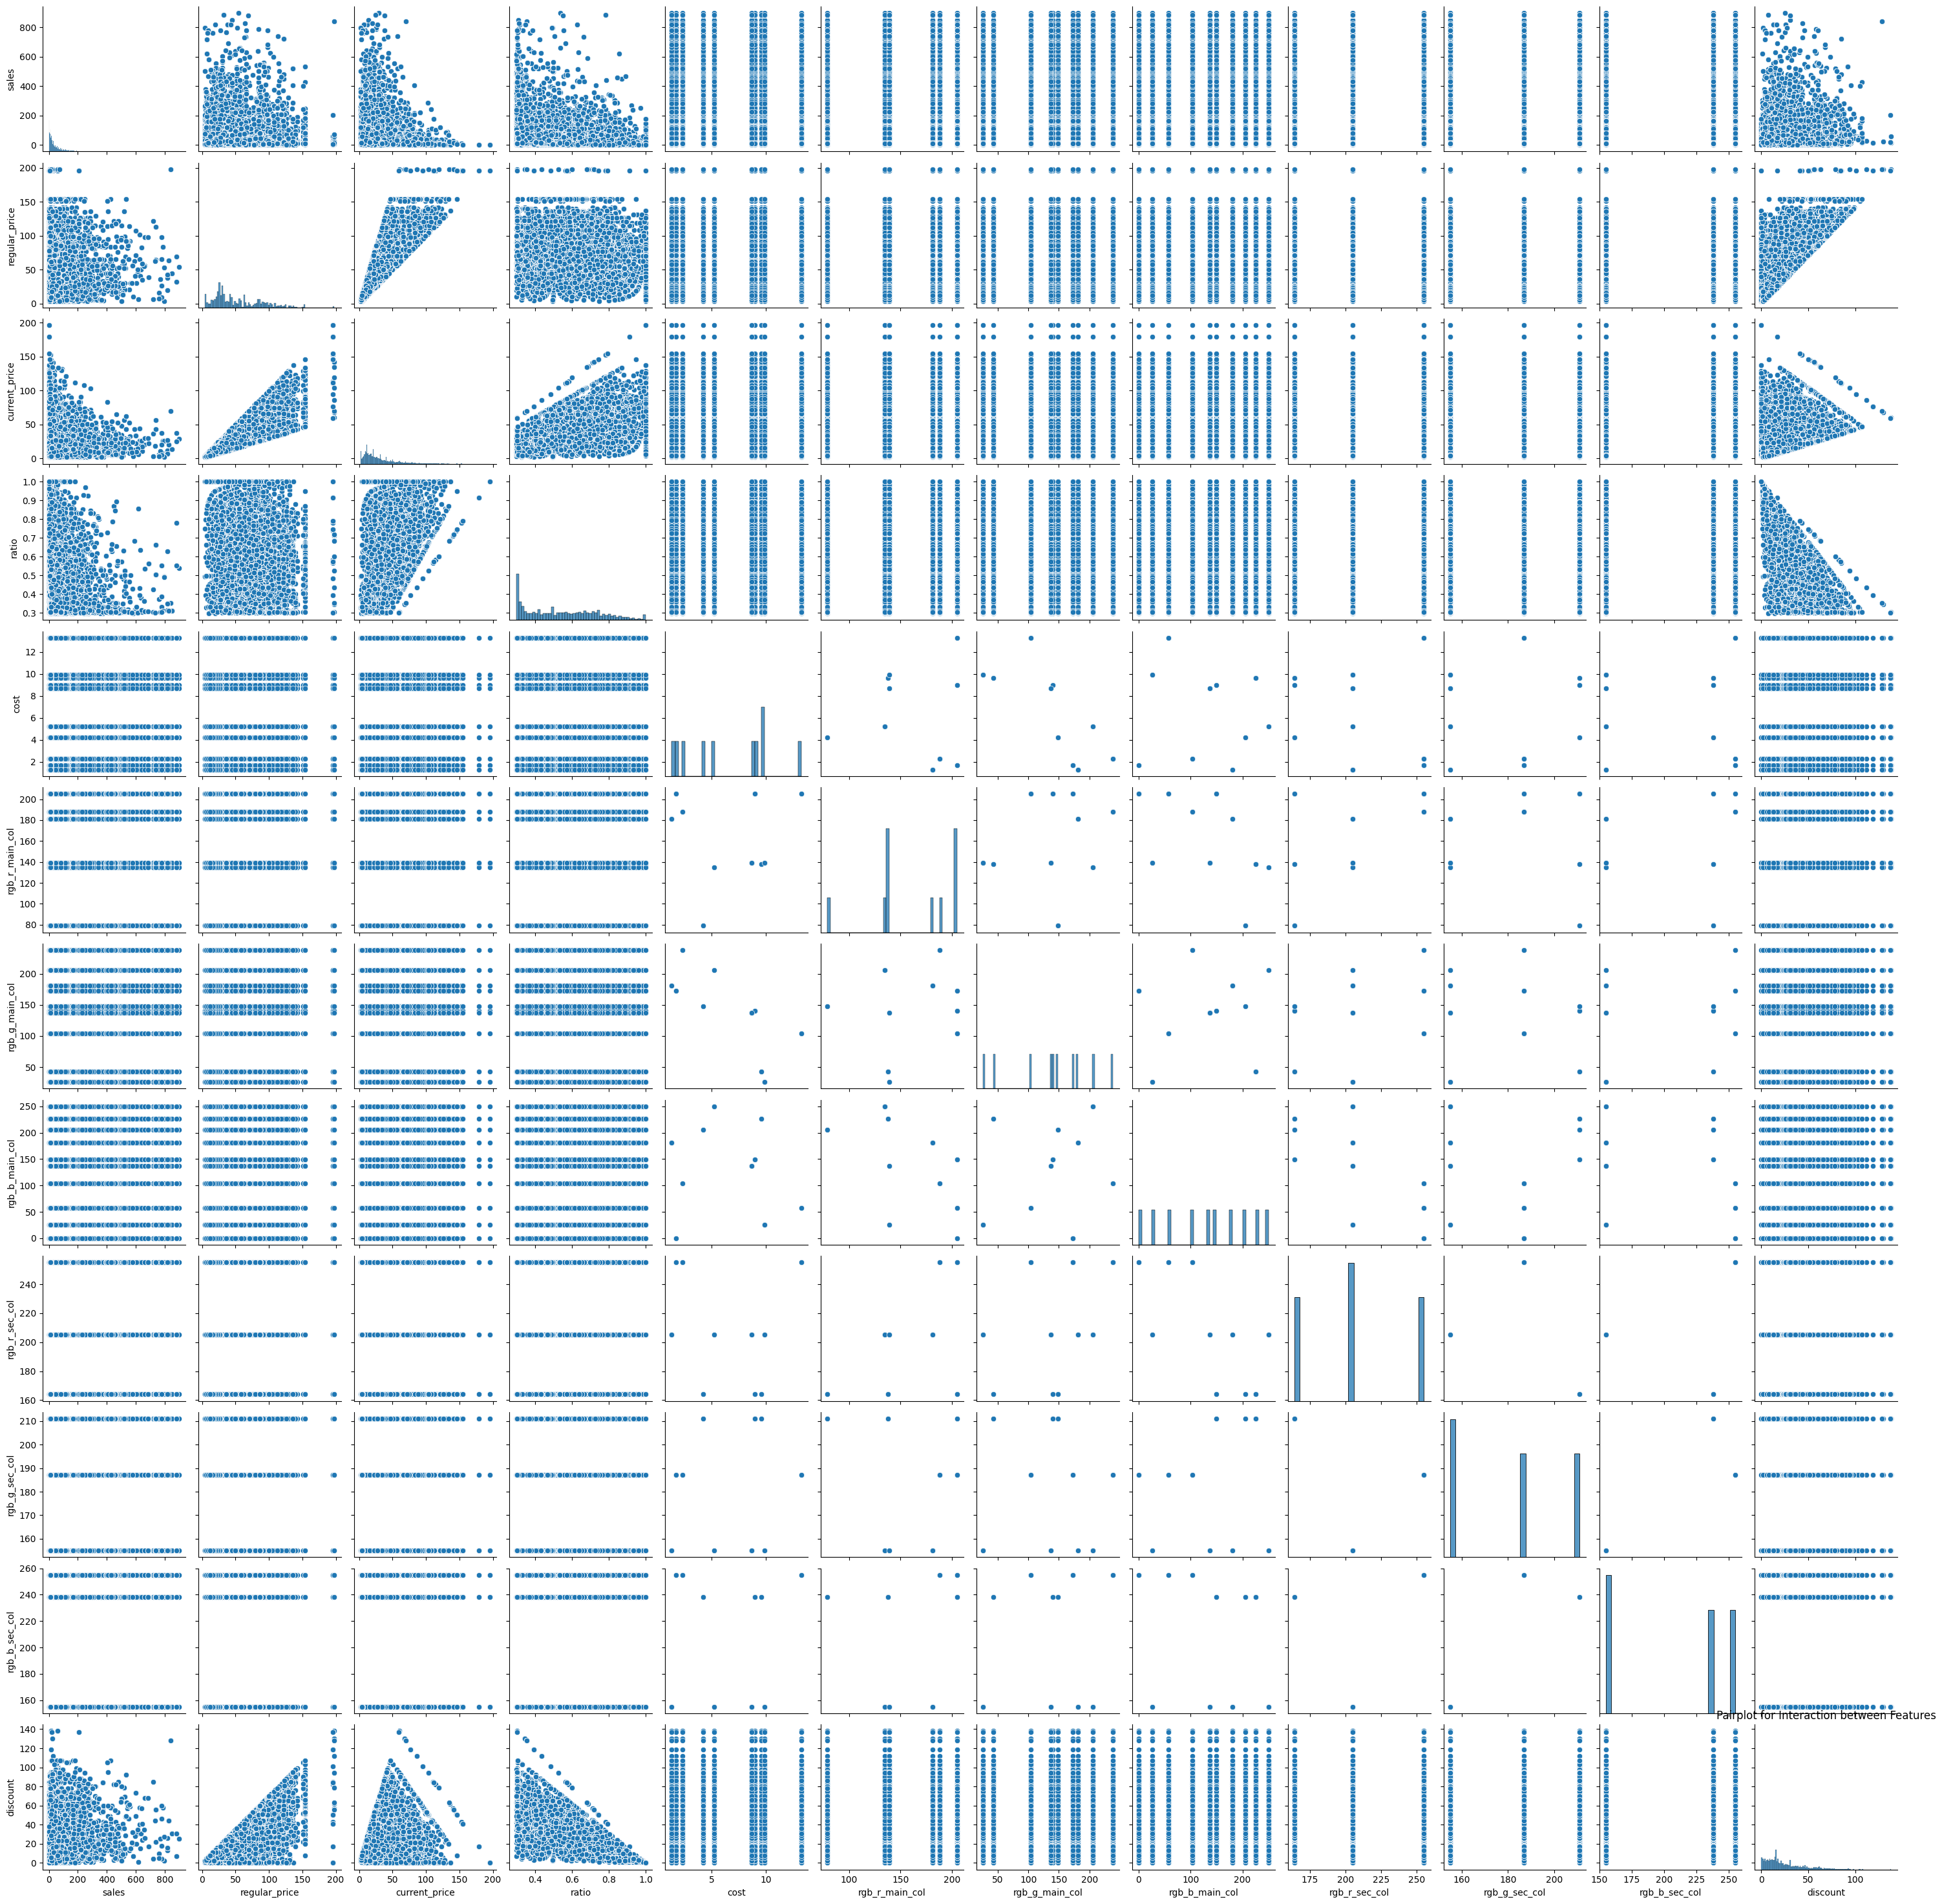

In [ ]:
plt.figure(figsize=(12, 12))
sns.pairplot(numerical_features)
plt.title('Pairplot for Interaction between Features')
plt.show()

### Advanced Feature Engineering

In [ ]:
# Creating new features based on existing ones
df.drop(columns=['price_diff'], inplace=True)

In [ ]:
df

,country,article,retailweek,article.1,productgroup,category,style,sizes,gender,sales,...,customer_id,cost,rgb_r_main_col,rgb_g_main_col,rgb_b_main_col,rgb_r_sec_col,rgb_g_sec_col,rgb_b_sec_col,label,discount
0,2,444,65,6,1,5,1,0,3,-0.327310,...,-0.900764,1.730142,1.095754,-0.559383,-0.942718,1.339449,0.238559,0.995439,-0.402266,-1.085512
1,2,444,65,1,2,5,0,0,3,-0.327310,...,-0.900764,-1.079774,0.668511,1.546161,-0.363532,1.339449,0.238559,0.995439,-0.402266,-1.085512
2,2,444,65,2,0,1,0,0,3,-0.327310,...,-0.900764,-1.230488,1.095754,0.524815,-1.645136,1.339449,0.238559,0.995439,-0.402266,-1.085512
3,2,444,65,5,1,4,0,0,0,-0.327310,...,-0.900764,0.634275,1.095754,0.006285,0.191008,-1.237504,1.260957,0.620218,-0.402266,-1.085512
4,2,444,65,4,1,3,0,0,3,-0.327310,...,-0.900764,0.787543,-0.588088,-1.517878,1.139888,-1.237504,1.260957,0.620218,-0.402266,-1.085512
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,2,275,78,8,3,5,2,0,3,1.935743,...,-0.646057,-0.591870,-2.070875,0.131989,0.881103,-1.237504,1.260957,0.620218,-0.402266,0.338890
99996,2,275,78,7,1,0,2,1,2,1.935743,...,-0.646057,0.864177,-0.562956,-1.784999,-1.324735,-0.076459,-1.124637,-1.211743,-0.402266,0.338890
99997,2,275,78,9,1,2,2,0,3,1.935743,...,-0.646057,-0.336424,-0.663484,1.043344,1.435643,-0.076459,-1.124637,-1.211743,-0.402266,0.338890
99998,2,275,78,3,0,4,1,0,3,1.935743,...,-0.646057,-1.335221,0.492587,0.650519,0.585348,-0.076459,-1.124637,-1.211743,-0.402266,0.338890


 ( over sampling )

# **Assign Feature and Target variables**



In [29]:
df.columns
#We note that the following columns do not affect the target at all ( Customrtid, cost, rpb_[r,b]_main_col ,rpb_[r,b]_sec_col

Index(['country', 'article', 'retailweek', 'article.1', 'productgroup',
       'category', 'style', 'sizes', 'gender', 'sales', 'regular_price',
       'current_price', 'ratio', 'promo1', 'promo2', 'customer_id', 'cost',
       'rgb_r_main_col', 'rgb_g_main_col', 'rgb_b_main_col', 'rgb_r_sec_col',
       'rgb_g_sec_col', 'rgb_b_sec_col', 'label', 'discount'],
      dtype='object')

In [30]:
X = df.drop(['label','customer_id' ,'cost', 'rgb_r_main_col','rgb_b_main_col', 'rgb_b_sec_col' , 'rgb_r_sec_col'], axis=1)
y = Target

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=200)


In [32]:
print(f"We have {len(X_train)} Training data\nWe have {len(X_test)} Testing data")


We have 75000 Training data
We have 25000 Testing data


# **Modeling**

In [33]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import  confusion_matrix, classification_report, roc_curve, auc, RocCurveDisplay
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier

import warnings
warnings.filterwarnings("ignore")

In [34]:
def kfolds(model, model_name):
    model = cross_val_score(model, X,y, cv=10)
    model_score = np.average(model)
    print(f"{model_name} score on cross validation: {model_score * 100}%")

def train(model, model_name):
    model.fit(X_train, y_train)
    model_train_score = model.score(X_train, y_train)
    model_test_score = model.score(X_test, y_test)
    print(f"{model_name} model score on Training data: {model_train_score * 100}%\n{model_name} model score on Testing data: {model_test_score * 100}%")

def conf_matrix(model):
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8,5))
    sns.heatmap(cm, annot=True, fmt='d');

def class_report(model):
    y_pred = model.predict(X_test)
    print(classification_report(y_test, y_pred))

def roc(model, model_name):
    y_pred = model.decision_function(X_test)
    fpr, tpr, _ = roc_curve(y_test, y_pred)
    auc_svm = auc(fpr, tpr)
    plt.figure(figsize=(5, 5), dpi=100)
    plt.plot(fpr, tpr, color="darkorange", label=f'{model_name} (auc = %0.3f)' % auc_svm)
    plt.plot([0, 1], [0, 1], color="navy", lw=2, linestyle="--")
    plt.xlabel('False Positive Rate -->')
    plt.ylabel('True Positive Rate -->')
    plt.legend()
    plt.show()

# **Logistic Regression**

In [35]:
model =LogisticRegression()


In [36]:
lr_model = LogisticRegression()
kfolds(lr_model, "Logistic Regression")
train(lr_model, "Logistic Regression")

Logistic Regression score on cross validation: 85.639%
Logistic Regression model score on Training data: 85.45866666666667%
Logistic Regression model score on Testing data: 85.576%


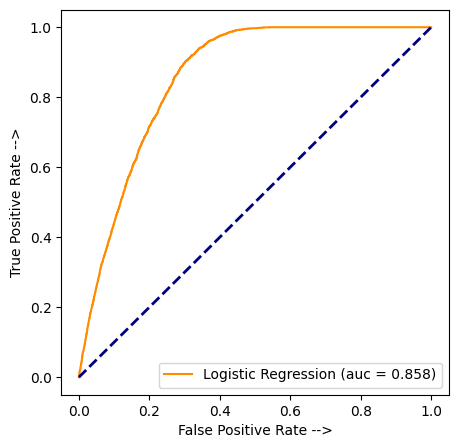

In [37]:
roc(lr_model, "Logistic Regression")


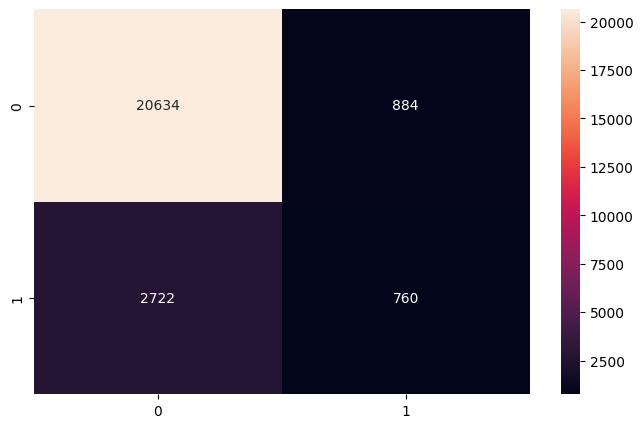

In [38]:
conf_matrix(lr_model)

# **Random Forest**

In [ ]:
rf_model = RandomForestClassifier(n_estimators=70, random_state=40)
kfolds(rf_model, "Random Forest")
train(rf_model, "Random Forest")

Random Forest score on cross validation: 84.52199999999999%
Random Forest model score on Training data: 99.99466666666666%
Random Forest model score on Testing data: 84.884%


OVER FITTING!!!

In [ ]:
class_report(rf_model)

              precision    recall  f1-score   support

           0       0.88      0.96      0.92     21518
           1       0.39      0.15      0.22      3482

    accuracy                           0.85     25000
   macro avg       0.63      0.56      0.57     25000
weighted avg       0.81      0.85      0.82     25000



# **KNN**

In [ ]:
knn_model = KNeighborsClassifier(n_neighbors=3)
kfolds(knn_model, "KNN")
train(knn_model, "KNN")

KNN score on cross validation: 82.60799999999999%
KNN model score on Training data: 89.94133333333333%
KNN model score on Testing data: 83.036%


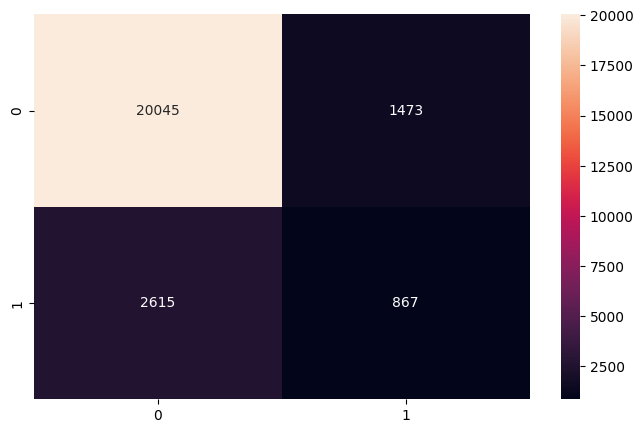

In [ ]:
conf_matrix(knn_model)

In [ ]:
class_report(knn_model)

              precision    recall  f1-score   support

           0       0.88      0.93      0.91     21518
           1       0.37      0.25      0.30      3482

    accuracy                           0.84     25000
   macro avg       0.63      0.59      0.60     25000
weighted avg       0.81      0.84      0.82     25000



# **Bagging**

In [ ]:
bagg_model = BaggingClassifier()
kfolds(bagg_model, "Bagging")
train(bagg_model, "Bagging")

Bagging score on cross validation: 83.90700000000001%
Bagging model score on Training data: 98.68933333333332%
Bagging model score on Testing data: 84.528%


OVER FITTING!!

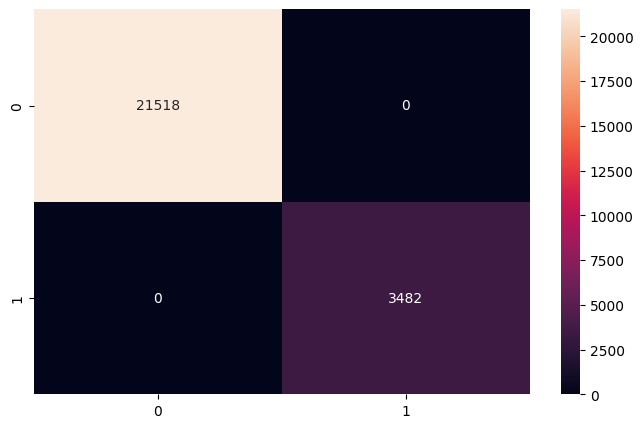

In [ ]:
conf_matrix(bagg_model)


In [ ]:
class_report(bagg_model)


              precision    recall  f1-score   support

           0       0.88      0.95      0.91     21518
           1       0.39      0.19      0.25      3482

    accuracy                           0.85     25000
   macro avg       0.63      0.57      0.58     25000
weighted avg       0.81      0.85      0.82     25000



# **Gradient Boosting**

In [42]:
gb_model = GradientBoostingClassifier()
kfolds(gb_model, "Boosting")
train(gb_model, "Boosting")

Boosting score on cross validation: 85.97700000000002%
Boosting model score on Training data: 86.36933333333333%
Boosting model score on Testing data: 85.952%


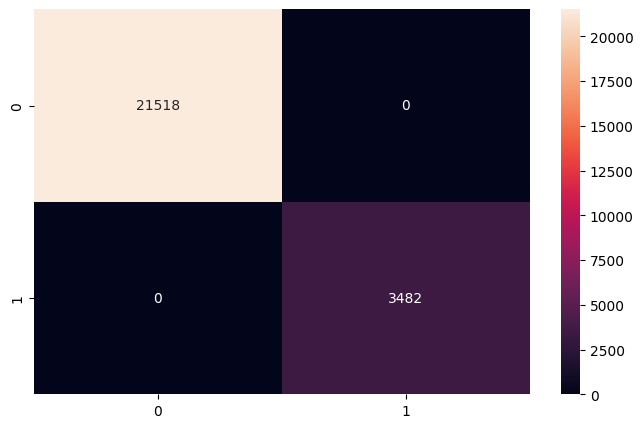

In [ ]:
conf_matrix(gb_model)


-------------------
The best models works on our data is Log_resression and Gradient Boosting with acc 85-86% in training and Test

In [ ]:
class_report(gb_model)

              precision    recall  f1-score   support

           0       0.87      0.99      0.92     21518
           1       0.46      0.05      0.09      3482

    accuracy                           0.86     25000
   macro avg       0.66      0.52      0.51     25000
weighted avg       0.81      0.86      0.81     25000



# **Saving the Model**

In [43]:
import joblib
joblib.dump(gb_model, 'Gradient Boosting.pkl')



['Gradient Boosting.pkl']

**We can make flask app for example :**

In [44]:
'''
from flask import Flask, request, jsonify
import joblib
import numpy as np

app = Flask(__name__)

# Load the saved model
model = joblib.load('Gradient Boosting.pkl')

@app.route('/')
def home():
    return "Welcome to the Gradient Boosting Model API"

@app.route('/predict', methods=['POST'])
def predict():
    try:
        # Get the JSON data from the request
        data = request.get_json()

        # Ensure the necessary input is provided
        if 'features' not in data:
            return jsonify({'error': 'No features provided'}), 400

        # Extract the features from the JSON
        features = data['features']

        # Convert features to numpy array for prediction
        features_array = np.array(features).reshape(1, -1)

        # Make prediction
        prediction = model.predict(features_array)

        # Return the prediction as a JSON response
        return jsonify({'prediction': prediction.tolist()}), 200

    except Exception as e:
        return jsonify({'error': str(e)}), 500

if __name__ == '__main__':
    app.run(debug=True)'''

' \nfrom flask import Flask, request, jsonify\nimport joblib\nimport numpy as np\n\napp = Flask(__name__)\n\n# Load the saved model\nmodel = joblib.load(\'Gradient Boosting.pkl\')\n\n@app.route(\'/\')\ndef home():\n    return "Welcome to the Gradient Boosting Model API"\n\n@app.route(\'/predict\', methods=[\'POST\'])\ndef predict():\n    try:\n        # Get the JSON data from the request\n        data = request.get_json()\n\n        # Ensure the necessary input is provided\n        if \'features\' not in data:\n            return jsonify({\'error\': \'No features provided\'}), 400\n\n        # Extract the features from the JSON\n        features = data[\'features\']\n\n        # Convert features to numpy array for prediction\n        features_array = np.array(features).reshape(1, -1)\n\n        # Make prediction\n        prediction = model.predict(features_array)\n\n        # Return the prediction as a JSON response\n        return jsonify({\'prediction\': prediction.tolist()}), 200\n\

-------------------------------

________________________________________________

# **Lets try Oversmpling using STOM**

In [ ]:
from imblearn.over_sampling import SMOTE


In [ ]:
df

,country,article,retailweek,article.1,productgroup,category,style,sizes,gender,sales,...,customer_id,cost,rgb_r_main_col,rgb_g_main_col,rgb_b_main_col,rgb_r_sec_col,rgb_g_sec_col,rgb_b_sec_col,label,discount
0,2,444,65,6,1,5,1,0,3,-0.327310,...,-0.900764,1.730142,1.095754,-0.559383,-0.942718,1.339449,0.238559,0.995439,-0.402266,-1.085512
1,2,444,65,1,2,5,0,0,3,-0.327310,...,-0.900764,-1.079774,0.668511,1.546161,-0.363532,1.339449,0.238559,0.995439,-0.402266,-1.085512
2,2,444,65,2,0,1,0,0,3,-0.327310,...,-0.900764,-1.230488,1.095754,0.524815,-1.645136,1.339449,0.238559,0.995439,-0.402266,-1.085512
3,2,444,65,5,1,4,0,0,0,-0.327310,...,-0.900764,0.634275,1.095754,0.006285,0.191008,-1.237504,1.260957,0.620218,-0.402266,-1.085512
4,2,444,65,4,1,3,0,0,3,-0.327310,...,-0.900764,0.787543,-0.588088,-1.517878,1.139888,-1.237504,1.260957,0.620218,-0.402266,-1.085512
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,2,275,78,8,3,5,2,0,3,1.935743,...,-0.646057,-0.591870,-2.070875,0.131989,0.881103,-1.237504,1.260957,0.620218,-0.402266,0.338890
99996,2,275,78,7,1,0,2,1,2,1.935743,...,-0.646057,0.864177,-0.562956,-1.784999,-1.324735,-0.076459,-1.124637,-1.211743,-0.402266,0.338890
99997,2,275,78,9,1,2,2,0,3,1.935743,...,-0.646057,-0.336424,-0.663484,1.043344,1.435643,-0.076459,-1.124637,-1.211743,-0.402266,0.338890
99998,2,275,78,3,0,4,1,0,3,1.935743,...,-0.646057,-1.335221,0.492587,0.650519,0.585348,-0.076459,-1.124637,-1.211743,-0.402266,0.338890


In [ ]:
df.drop(columns=['article', 'article.1' , 'retailweek'], inplace=True)

In [ ]:
df.drop(columns=['label'], inplace=True)

In [ ]:
df

,country,productgroup,category,style,sizes,gender,sales,regular_price,current_price,ratio,...,promo2,customer_id,cost,rgb_r_main_col,rgb_g_main_col,rgb_b_main_col,rgb_r_sec_col,rgb_g_sec_col,rgb_b_sec_col,discount
0,2,1,5,1,0,3,-0.327310,-1.316661,-1.078065,0.608245,...,-0.070172,-0.900764,1.730142,1.095754,-0.559383,-0.942718,1.339449,0.238559,0.995439,-1.085512
1,2,2,5,0,0,3,-0.327310,-1.316661,-1.078065,0.608245,...,-0.070172,-0.900764,-1.079774,0.668511,1.546161,-0.363532,1.339449,0.238559,0.995439,-1.085512
2,2,0,1,0,0,3,-0.327310,-1.316661,-1.078065,0.608245,...,-0.070172,-0.900764,-1.230488,1.095754,0.524815,-1.645136,1.339449,0.238559,0.995439,-1.085512
3,2,1,4,0,0,0,-0.327310,-1.316661,-1.078065,0.608245,...,-0.070172,-0.900764,0.634275,1.095754,0.006285,0.191008,-1.237504,1.260957,0.620218,-1.085512
4,2,1,3,0,0,3,-0.327310,-1.316661,-1.078065,0.608245,...,-0.070172,-0.900764,0.787543,-0.588088,-1.517878,1.139888,-1.237504,1.260957,0.620218,-1.085512
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,2,3,5,2,0,3,1.935743,0.157598,-0.059385,-0.414638,...,-0.070172,-0.646057,-0.591870,-2.070875,0.131989,0.881103,-1.237504,1.260957,0.620218,0.338890
99996,2,1,0,2,1,2,1.935743,0.157598,-0.059385,-0.414638,...,-0.070172,-0.646057,0.864177,-0.562956,-1.784999,-1.324735,-0.076459,-1.124637,-1.211743,0.338890
99997,2,1,2,2,0,3,1.935743,0.157598,-0.059385,-0.414638,...,-0.070172,-0.646057,-0.336424,-0.663484,1.043344,1.435643,-0.076459,-1.124637,-1.211743,0.338890
99998,2,0,4,1,0,3,1.935743,0.157598,-0.059385,-0.414638,...,-0.070172,-0.646057,-1.335221,0.492587,0.650519,0.585348,-0.076459,-1.124637,-1.211743,0.338890


In [ ]:
X= df
y= Target

In [ ]:
y.value_counts()

label
0    86072
1    13928
Name: count, dtype: int64

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

# Verify the new class distribution
print("Original class distribution:")
print(y_train.value_counts())
print("\nResampled class distribution:")
print(y_train_res.value_counts())

Original class distribution:
label
0    68883
1    11117
Name: count, dtype: int64

Resampled class distribution:
label
0    68883
1    68883
Name: count, dtype: int64


<Axes: xlabel='label', ylabel='count'>

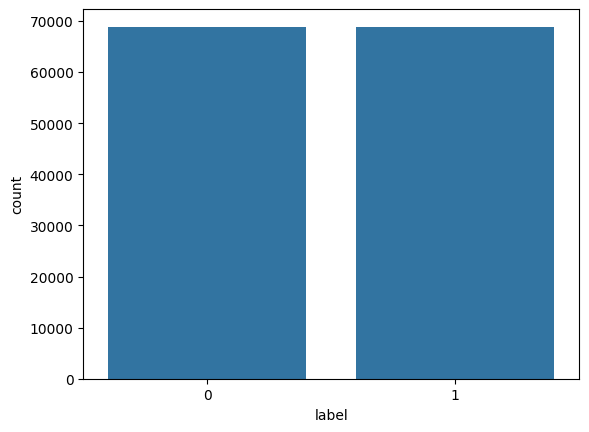

In [ ]:
sns.countplot(x=y_train_res)

In [ ]:
X_train ,y_train = X_train_res, y_train_res

# **Logistic Regression**

In [ ]:
model =LogisticRegression()

lr_model = LogisticRegression()
kfolds(lr_model, "Logistic Regression")
train(lr_model, "Logistic Regression")

Logistic Regression score on cross validation: 85.745%
Logistic Regression model score on Training data: 79.10660104815412%
Logistic Regression model score on Testing data: 75.6%


# **Random Forest**

In [ ]:
rf_model = RandomForestClassifier(n_estimators=70, random_state=40)
kfolds(rf_model, "Random Forest")
train(rf_model, "Random Forest")

Random Forest score on cross validation: 84.452%
Random Forest model score on Training data: 99.99854826299668%
Random Forest model score on Testing data: 80.81%


In [ ]:
knn_model = KNeighborsClassifier(n_neighbors=3)
kfolds(knn_model, "KNN")
train(knn_model, "KNN")

KNN score on cross validation: 82.99300000000001%
KNN model score on Training data: 93.11005618222204%
KNN model score on Testing data: 76.205%
